### Loading the Files

In [37]:
import spectral 

PE_1img = spectral.open_image('insertfilepath.hdr') #PE Batch 1
PE_2img = spectral.open_image('insertfilepath.hdr') #PE Batch 2
PE_3img = spectral.open_image('insertfilepath.hdr') #PE Batch 3
PS_1img = spectral.open_image('insertfilepath.hdr') #PS Batch 1
PS_2img = spectral.open_image('insertfilepath.hdr') #PS Batch 2
PS_3img = spectral.open_image('insertfilepath.hdr') #PS Batch 3
PS_4img = spectral.open_image('insertfilepath.hdr') #PS Batch 4
PMMA_img = spectral.open_image('insertfilepath.hdr') #PMMA Batch 1
PET_1img = spectral.open_image('insertfilepath.hdr') #PET Batch 1
PET_2img = spectral.open_image('insertfilepath.hdr') #PET Batch 2
PVC_1img = spectral.open_image('insertfilepath.hdr') #UPVC Batch 1
PVC_2img = spectral.open_image('insertfilepath.hdr') #UPVC Batch 2
EVAC_1img = spectral.open_image('insertfilepath.hdr') #EVAc Batch 1
PA_1img = spectral.open_image('insertfilepath.hdr') #PA Batch 1
PA_2img = spectral.open_image('insertfilepath.hdr') #PA Batch 2
PVDF_1img = spectral.open_image('insertfilepath.hdr') #PVDF Batch 1
PVDF_2img = spectral.open_image('insertfilepath.hdr') #PVDF Batch 2
SNX_1img = spectral.open_image('insertfilepath.hdr') # Spruce Needle Wax Batch 1
SNX_2img = spectral.open_image('insertfilepath.hdr') # Spruce Needle Wax Batch 2
SNX_3img = spectral.open_image('insertfilepath.hdr') # Spruce Needle Wax Batch 3
SNX_4img = spectral.open_image('insertfilepath.hdr') # Spruce Needle Wax Batch 4
BWX_1img = spectral.open_image('insertfilepath.hdr') # Basswood Leaf Wax Batch 1
PPP_1img = spectral.open_image('insertfilepath.hdr') # Ponderosa Pine Pollen Batch 1
Cotton_1img = spectral.open_image('insertfilepath.hdr') # Cotton Fiber Batch 1
Cotton_2img = spectral.open_image('insertfilepath.hdr') # Cotton Fiber Batch 2
Cotton_3img = spectral.open_image('insertfilepath.hdr') # Cotton Fiber Batch 3
Cotton_4img = spectral.open_image('insertfilepath.hdr') # Cotton Fiber Batch 4
PU_1img = spectral.open_image('insertfilepath.hdr') #PU Batch 1 
PU_2img = spectral.open_image('insertfilepath.hdr') #PU Batch 2 
PU_3img = spectral.open_image('insertfilepath.hdr') #PU Batch 3 
PU_4img = spectral.open_image('insertfilepath.hdr') #PU Batch 4
PP_1img = spectral.open_image('insertfilepath.hdr') #PP Batch 1
PP_2img = spectral.open_image('insertfilepath.hdr') #PP Batch 2 
PP_3img = spectral.open_image('insertfilepath.hdr') #PP Batch 3 
PP_4img = spectral.open_image('insertfilepath.hdr') #PP Batch 4 
PP_5img = spectral.open_image('insertfilepath.hdr') #PP Batch 5 
PP_6img = spectral.open_image('insertfilepath.hdr') #PP Batch 6 
PET_3img = spectral.open_image('insertfilepath.hdr') #PET Batch 3
PET_4img = spectral.open_image('insertfilepath.hdr') #PET Batch 4
PET_5img = spectral.open_image('insertfilepath.hdr') #PET Batch 5
ABS_1img = spectral.open_image('insertfilepath.hdr') #ABS Batch 1
ABS_2img = spectral.open_image('insertfilepath.hdr') #ABS Batch 2


# ABS

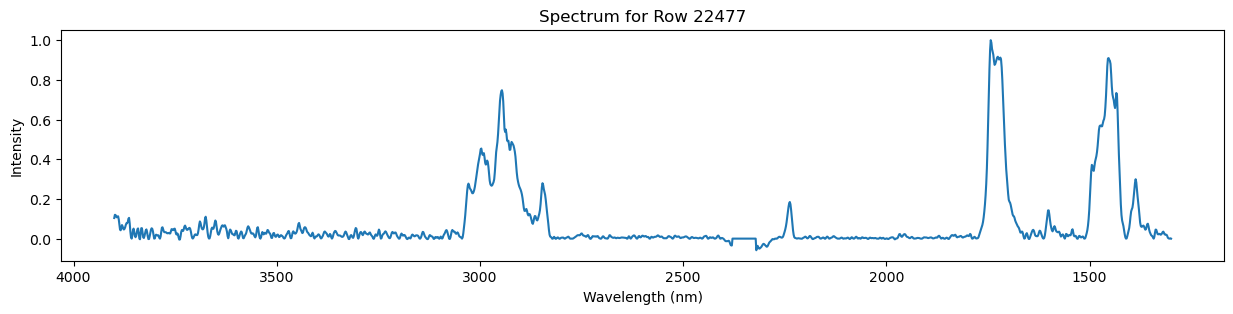

Calculated ratios for Row 22477:
  2900 cm-1 / 2500 cm-1: 43.99
  2900 cm-1 / 2600 cm-1: 16.51
  2900 cm-1 / 3500 cm-1: 17.84
  2900 cm-1 / 3700 cm-1: 11.47
Total number of rows where all ratios > 35: 4103


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "ABS_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var] 
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing


# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [2900, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 22477 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()
# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2900_2600 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2900_3500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3500]]]
    selected_row_ratio_2900_3700 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3700]]]
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
    print(f"  2900 cm-1 / 3500 cm-1: {selected_row_ratio_2900_3500:.2f}")
    print(f"  2900 cm-1 / 3700 cm-1: {selected_row_ratio_2900_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")


ratio_2900_2500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2900_2600 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2900_3500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3500]]
ratio_2900_3700 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3700]]



both_ratios_mask = (ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 10) & (ratio_2900_3700 > 10)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 35: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
ABS_conversion_1 = data_df[(ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 10) & (ratio_2900_3700 > 10)].copy()
ABS_conversion_1.loc[:, 'Polymer'] = 12



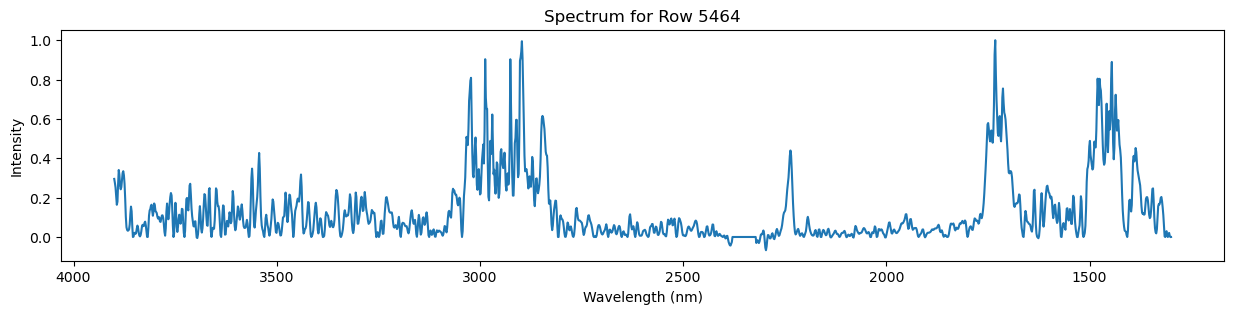

Calculated ratios for Row 5464:
  2900 cm-1 / 2500 cm-1: 99.47
  2900 cm-1 / 2600 cm-1: 55.04
  2900 cm-1 / 3500 cm-1: 43.57
  2900 cm-1 / 3700 cm-1: 11.45
Total number of rows where all ratios > 35: 7473


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "ABS_2"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var] 
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing


# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [2900, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 22477 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()
# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2900_2600 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2900_3500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3500]]]
    selected_row_ratio_2900_3700 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3700]]]
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
    print(f"  2900 cm-1 / 3500 cm-1: {selected_row_ratio_2900_3500:.2f}")
    print(f"  2900 cm-1 / 3700 cm-1: {selected_row_ratio_2900_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")


ratio_2900_2500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2900_2600 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2900_3500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3500]]
ratio_2900_3700 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3700]]



both_ratios_mask = (ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 10) & (ratio_2900_3700 > 10)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 35: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
ABS_conversion_2 = data_df[(ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 10) & (ratio_2900_3700 > 10)].copy()
ABS_conversion_2.loc[:, 'Polymer'] = 12

# PE

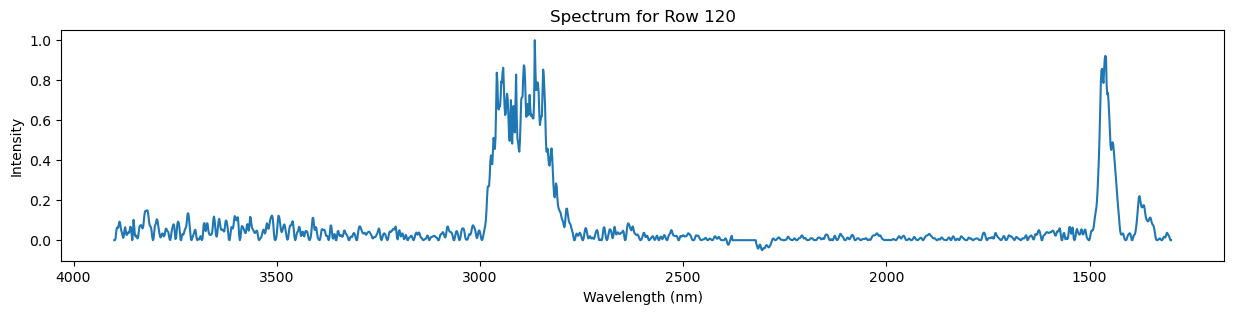

Calculated ratios for Row 120:
  2850 cm-1 / 2500 cm-1: 24.96
  2850 cm-1 / 2600 cm-1: 38.72
  2850 cm-1 / 3500 cm-1: 30.10
  2850 cm-1 / 3700 cm-1: 11.53
Total number of rows where all ratios > 35: 16185


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "PE_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]  
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])

# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [2850, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)

data_df = data_df[denominator_mask]
ROW_INDEX = 120 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2850_2500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2850_2600 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2850_3500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[3500]]]
    selected_row_ratio_2850_3700 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[3700]]]
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2850 cm-1 / 2500 cm-1: {selected_row_ratio_2850_2500:.2f}")
    print(f"  2850 cm-1 / 2600 cm-1: {selected_row_ratio_2850_2600:.2f}")
    print(f"  2850 cm-1 / 3500 cm-1: {selected_row_ratio_2850_3500:.2f}")
    print(f"  2850 cm-1 / 3700 cm-1: {selected_row_ratio_2850_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")


ratio_2850_2500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2850_2600 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2850_3500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[3500]]
ratio_2850_3700 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[3700]]

both_ratios_mask = (ratio_2850_2500 > 5) & (ratio_2850_2600 > 5) & (ratio_2850_3500 > 5) & (ratio_2850_3700 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 35: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PE_conversion_1 = data_df[(ratio_2850_2500 > 5) & (ratio_2850_2600 > 5) & (ratio_2850_3500 > 5) & (ratio_2850_3700 > 5)].copy()
PE_conversion_1.loc[:, 'Polymer'] = 1


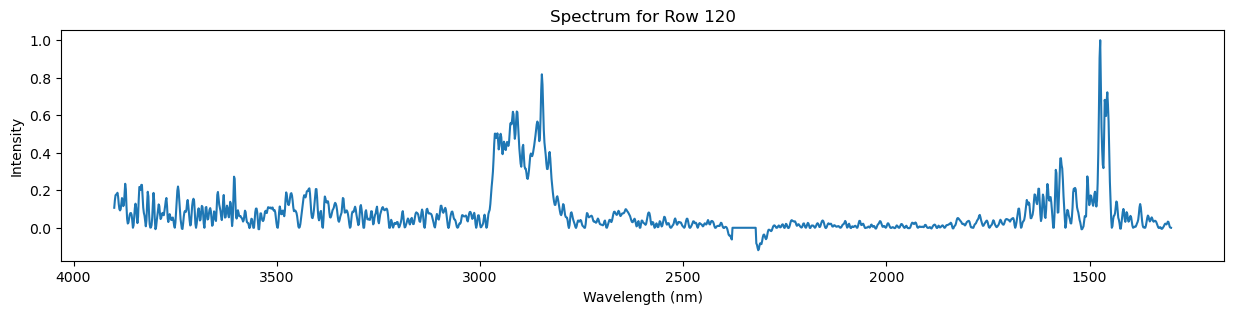

Calculated ratios for Row 120:
  2850 cm-1 / 2500 cm-1: 75.16
  2850 cm-1 / 2600 cm-1: 15.56
  2850 cm-1 / 3500 cm-1: 25.63
  2850 cm-1 / 3700 cm-1: 27.26
Total number of rows where all ratios > 35: 19460


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "PE_2"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]  
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])

# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [2850, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)

data_df = data_df[denominator_mask]
ROW_INDEX = 120 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2850_2500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2850_2600 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2850_3500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[3500]]]
    selected_row_ratio_2850_3700 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[3700]]]
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2850 cm-1 / 2500 cm-1: {selected_row_ratio_2850_2500:.2f}")
    print(f"  2850 cm-1 / 2600 cm-1: {selected_row_ratio_2850_2600:.2f}")
    print(f"  2850 cm-1 / 3500 cm-1: {selected_row_ratio_2850_3500:.2f}")
    print(f"  2850 cm-1 / 3700 cm-1: {selected_row_ratio_2850_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")


ratio_2850_2500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2850_2600 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2850_3500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[3500]]
ratio_2850_3700 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[3700]]

both_ratios_mask = (ratio_2850_2500 > 5) & (ratio_2850_2600 > 5) & (ratio_2850_3500 > 5) & (ratio_2850_3700 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 35: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PE_conversion_2 = data_df[(ratio_2850_2500 > 5) & (ratio_2850_2600 > 5) & (ratio_2850_3500 > 5) & (ratio_2850_3700 > 5)].copy()
PE_conversion_2.loc[:, 'Polymer'] = 1

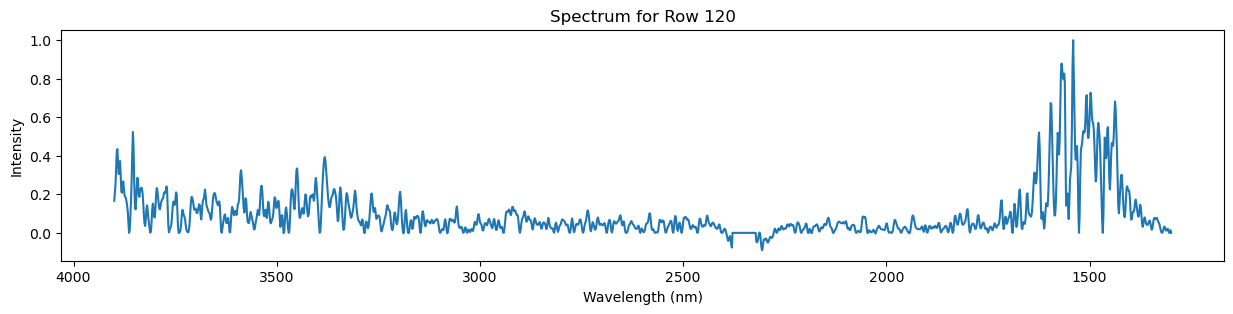

Calculated ratios for Row 120:
  2850 cm-1 / 2500 cm-1: 0.91
  2850 cm-1 / 2600 cm-1: 2.31
  2850 cm-1 / 3500 cm-1: 0.31
  2850 cm-1 / 3700 cm-1: 0.32
Total number of rows where all ratios > 35: 7587


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "PE_3"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]  
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])

# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [2850, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)

data_df = data_df[denominator_mask]
ROW_INDEX = 120 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2850_2500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2850_2600 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2850_3500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[3500]]]
    selected_row_ratio_2850_3700 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[3700]]]
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2850 cm-1 / 2500 cm-1: {selected_row_ratio_2850_2500:.2f}")
    print(f"  2850 cm-1 / 2600 cm-1: {selected_row_ratio_2850_2600:.2f}")
    print(f"  2850 cm-1 / 3500 cm-1: {selected_row_ratio_2850_3500:.2f}")
    print(f"  2850 cm-1 / 3700 cm-1: {selected_row_ratio_2850_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")


ratio_2850_2500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2850_2600 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2850_3500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[3500]]
ratio_2850_3700 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[3700]]

both_ratios_mask = (ratio_2850_2500 > 5) & (ratio_2850_2600 > 5) & (ratio_2850_3500 > 5) & (ratio_2850_3700 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 35: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PE_conversion_3 = data_df[(ratio_2850_2500 > 5) & (ratio_2850_2600 > 5) & (ratio_2850_3500 > 5) & (ratio_2850_3700 > 5)].copy()
PE_conversion_3.loc[:, 'Polymer'] = 1

## PMMA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "PMMA_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]  
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])

# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [3000, 2600, 2500]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[3000]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2500]] != 0) 

data_df = data_df[denominator_mask]
ROW_INDEX = 15308 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_3000_2500 = selected_row[wavelengths[wavelength_indices[3000]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_3000_2600 = selected_row[wavelengths[wavelength_indices[3000]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  3000 cm-1 / 2500 cm-1: {selected_row_ratio_3000_2500:.2f}")
    print(f"  3000 cm-1 / 2600 cm-1: {selected_row_ratio_3000_2600:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")


ratio_3000_2500 = data_df.iloc[:, wavelength_indices[3000]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_3000_2600 = data_df.iloc[:, wavelength_indices[3000]] / data_df.iloc[:, wavelength_indices[2600]]


both_ratios_mask = (ratio_3000_2500 > 35) & (ratio_3000_2600 > 35) 
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 35: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PMMA_conversion_1 = data_df[(ratio_3000_2500 > 35) & (ratio_3000_2600 > 35)].copy()
PMMA_conversion_1.loc[:, 'Polymer'] = 0

## PVC
##### UPVC and PVC Combined

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PVC_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [2950, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)
data_df = data_df[denominator_mask]


ROW_INDEX = 189288 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]
    
# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2950_2600 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2950_3500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3500]]]
    selected_row_ratio_2950_3700 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3700]]]
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3500 cm-1: {selected_row_ratio_2950_3500:.2f}")
    print(f"  2950 cm-1 / 3700 cm-1: {selected_row_ratio_2950_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2950_2500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2950_2600 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2950_3500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3500]]
ratio_2950_3700 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3700]]


both_ratios_mask = (ratio_2950_2500 > 5) & (ratio_2950_2600 > 5) & (ratio_2950_3500 > 5) & (ratio_2950_3700 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 5: {len(rows_with_all_high_ratios)}")
print(rows_with_all_high_ratios)

# ---------- Saving the Data and Giving Category Number 
PVC_conversion_1 = data_df[(ratio_2950_2500 > 5) & (ratio_2950_2600 > 5) & (ratio_2950_3500 > 5) & (ratio_2950_3700 > 5)].copy()
PVC_conversion_1.loc[:, 'Polymer'] = 4


Row 189288 is not in the filtered data.
Total number of rows where all ratios > 35: 3
[44040, 107744, 116275]


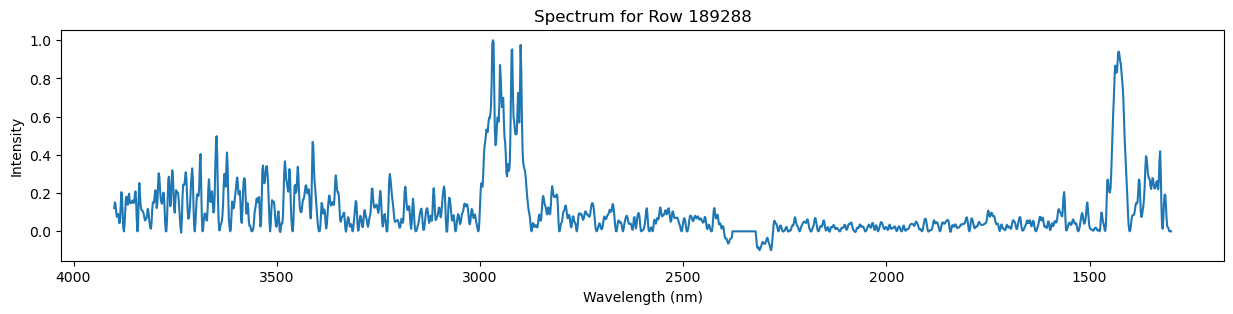

Calculated ratios for Row 189288:
  2950 cm-1 / 2500 cm-1: 22.71
  2950 cm-1 / 2600 cm-1: 148.59
  2950 cm-1 / 3500 cm-1: 36.65
  2950 cm-1 / 3700 cm-1: 23.50
Total number of rows where all ratios > 35: 64
[34330, 59083, 73680, 87788, 94981, 99296, 159604, 170893, 189288, 193049, 197708, 217958, 224673, 231408, 234763, 238119, 265790, 276612, 328569, 328587, 346637, 388871, 399690, 400810, 410183, 419322, 442543, 455204, 456122, 458480, 459482, 475063, 475345, 477416, 483991, 556073, 657736, 683525, 689699, 698766, 702575, 716153, 740780, 767455, 786376, 831146, 868360, 875524, 881256, 898570, 919201, 968192, 980973, 982225, 1021377, 1038183, 1044423, 1051584, 1056758, 1066553, 1072953, 1105207, 1108562, 1160872]


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PVC_2"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [2950, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)
data_df = data_df[denominator_mask]


ROW_INDEX = 189288 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]
    
# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2950_2600 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2950_3500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3500]]]
    selected_row_ratio_2950_3700 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3700]]]
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3500 cm-1: {selected_row_ratio_2950_3500:.2f}")
    print(f"  2950 cm-1 / 3700 cm-1: {selected_row_ratio_2950_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2950_2500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2950_2600 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2950_3500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3500]]
ratio_2950_3700 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3700]]


both_ratios_mask = (ratio_2950_2500 > 5) & (ratio_2950_2600 > 5) & (ratio_2950_3500 > 5) & (ratio_2950_3700 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 5: {len(rows_with_all_high_ratios)}")
print(rows_with_all_high_ratios)

# ---------- Saving the Data and Giving Category Number 
PVC_conversion_2 = data_df[(ratio_2950_2500 > 5) & (ratio_2950_2600 > 5) & (ratio_2950_3500 > 5) & (ratio_2950_3700 > 5)].copy()
PVC_conversion_2.loc[:, 'Polymer'] = 4


## PA

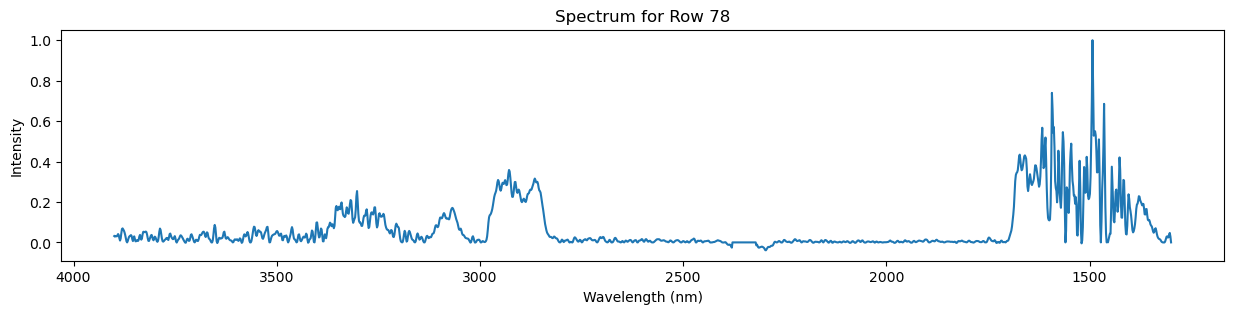

Calculated ratios for Row 78:
  2950 cm-1 / 2500 cm-1: 44.45
  2950 cm-1 / 2600 cm-1: 17.43
  2950 cm-1 / 3600 cm-1: 20.41
  2950 cm-1 / 3800 cm-1: 9.33
Total number of rows where both ratios > 35: 216


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "PA_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"


# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 3600, 3800]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3800]] != 0)
data_df = data_df[denominator_mask]


ROW_INDEX = 78 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2950_2600 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2950_3600 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3600]]])
    selected_row_ratio_2950_3800 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3800]]])

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3600 cm-1: {selected_row_ratio_2950_3600:.2f}")
    print(f"  2950 cm-1 / 3800 cm-1: {selected_row_ratio_2950_3800:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2950_2500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2950_2600 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2950_3600 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3600]])
ratio_2950_3800 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3800]])

both_ratios_mask = (ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3600 > 5) & (ratio_2950_3800 > 5) 
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where both ratios > 10: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PA_conversion_1 = data_df[both_ratios_mask].copy()
PA_conversion_1.loc[:, 'Polymer'] = 5

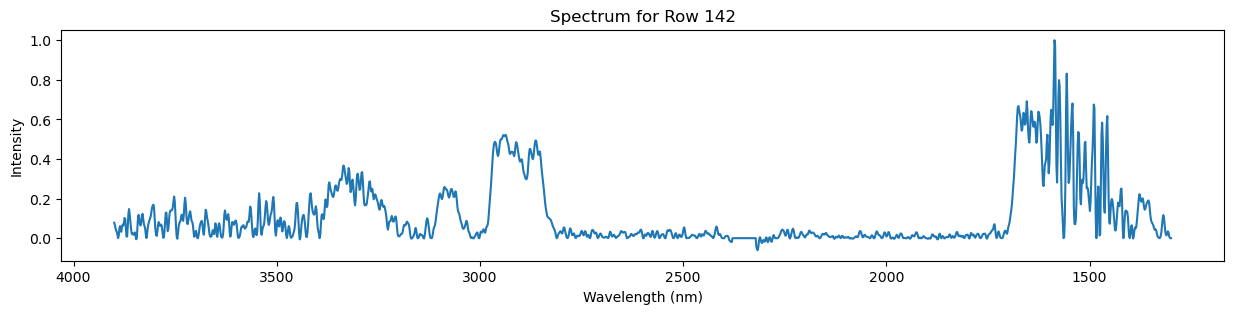

Calculated ratios for Row 142:
  2950 cm-1 / 2500 cm-1: 16.94
  2950 cm-1 / 2600 cm-1: 31.76
  2950 cm-1 / 3600 cm-1: 5.45
  2950 cm-1 / 3800 cm-1: 5.58
Total number of rows where both ratios > 35: 33233


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "PA_2"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"


# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 3600, 3800]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3800]] != 0)
data_df = data_df[denominator_mask]


ROW_INDEX = 78 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2950_2600 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2950_3600 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3600]]])
    selected_row_ratio_2950_3800 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3800]]])

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3600 cm-1: {selected_row_ratio_2950_3600:.2f}")
    print(f"  2950 cm-1 / 3800 cm-1: {selected_row_ratio_2950_3800:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2950_2500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2950_2600 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2950_3600 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3600]])
ratio_2950_3800 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3800]])

both_ratios_mask = (ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3600 > 5) & (ratio_2950_3800 > 5) 
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where both ratios > 10: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PA_conversion_2 = data_df[both_ratios_mask].copy()
PA_conversion_2.loc[:, 'Polymer'] = 5

## EVAC

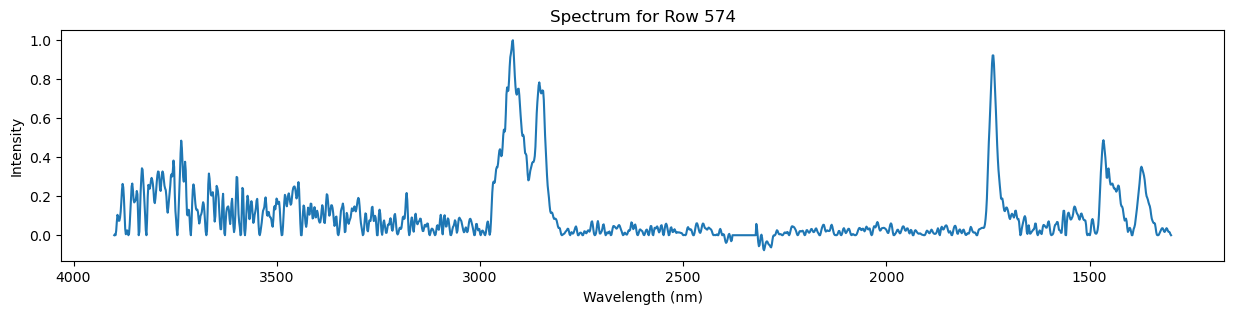

Calculated ratios for Row 574:
  2850 nm / 2500 nm: 494.32
  2850 nm / 2600 nm: 36.15
Total number of rows where both ratios > 35: 314


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "EVAC_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2850, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]


ROW_INDEX = 574  # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2850_2500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2850_2600 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2850 nm / 2500 nm: {selected_row_ratio_2850_2500:.2f}")
    print(f"  2850 nm / 2600 nm: {selected_row_ratio_2850_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2850_2500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2850_2600 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2600]]

both_ratios_mask = (ratio_2850_2500 > 35) & (ratio_2850_2600 > 35)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")


# ---------- Saving the Data and Giving Category Number 
EVAC_conversion_1 = data_df[both_ratios_mask].copy()
EVAC_conversion_1.loc[:, 'Polymer'] = 3 

## PET

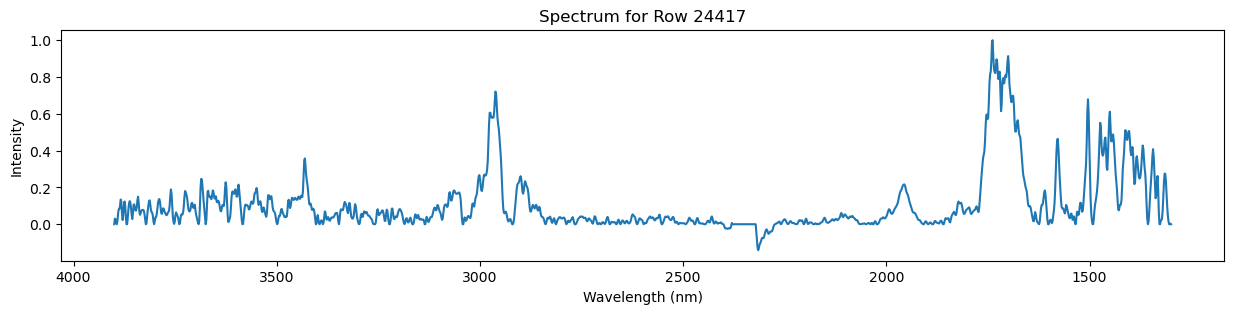

Calculated ratios for Row 24417:
  2950 cm-1 / 2500 cm-1: 75.09
  2950 cm-1 / 2600 cm-1: 20.90
  2950 cm-1 / 3500 cm-1: 43.64
  2950 cm-1 / 3800 cm-1: 22.04
Total number of rows where all ratios: 561


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PET_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 3500,3800]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3800]] != 0)

data_df = data_df[denominator_mask]


ROW_INDEX = 24417 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2950_2600 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2950_3500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3500]]])
    selected_row_ratio_2950_3800 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3800]]])

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3500 cm-1: {selected_row_ratio_2950_3500:.2f}")
    print(f"  2950 cm-1 / 3800 cm-1: {selected_row_ratio_2950_3800:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2950_2500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2950_2600 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2950_3500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3500]])
ratio_2950_3800 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3800]])

both_ratios_mask = (ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 10) & (ratio_2950_3800 > 10)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PET_conversion_1 = data_df[(ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 10) & (ratio_2950_3800 > 10)].copy()
PET_conversion_1.loc[:, 'Polymer'] = 4

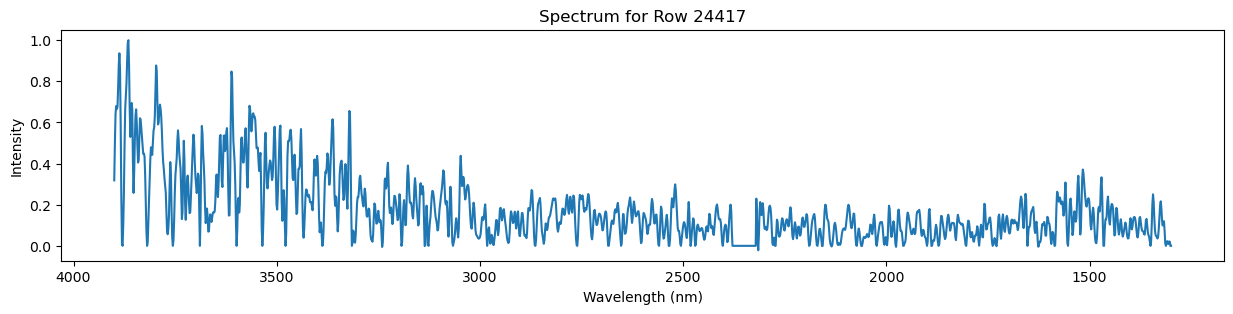

Calculated ratios for Row 24417:
  2950 cm-1 / 2500 cm-1: 2.05
  2950 cm-1 / 2600 cm-1: 2.48
  2950 cm-1 / 3500 cm-1: 0.91
  2950 cm-1 / 3800 cm-1: 0.29
Total number of rows where all ratios: 22678


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PET_2"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 3500,3800]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3800]] != 0)

data_df = data_df[denominator_mask]


ROW_INDEX = 24417 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2950_2600 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2950_3500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3500]]])
    selected_row_ratio_2950_3800 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3800]]])

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3500 cm-1: {selected_row_ratio_2950_3500:.2f}")
    print(f"  2950 cm-1 / 3800 cm-1: {selected_row_ratio_2950_3800:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2950_2500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2950_2600 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2950_3500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3500]])
ratio_2950_3800 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3800]])

both_ratios_mask = (ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 10) & (ratio_2950_3800 > 10)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PET_conversion_2 = data_df[(ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 10) & (ratio_2950_3800 > 10)].copy()
PET_conversion_2.loc[:, 'Polymer'] = 4

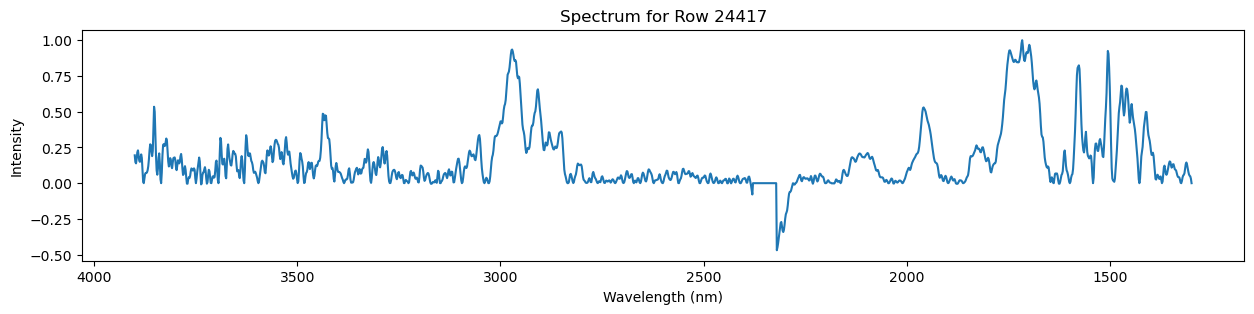

Calculated ratios for Row 24417:
  2950 cm-1 / 2500 cm-1: 16.31
  2950 cm-1 / 2600 cm-1: 55729.81
  2950 cm-1 / 3500 cm-1: 21.27
  2950 cm-1 / 3800 cm-1: 3.84
Total number of rows where all ratios: 6099


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PET_3"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 3500,3800]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3800]] != 0)

data_df = data_df[denominator_mask]


ROW_INDEX = 24417 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2950_2600 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2950_3500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3500]]])
    selected_row_ratio_2950_3800 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3800]]])

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3500 cm-1: {selected_row_ratio_2950_3500:.2f}")
    print(f"  2950 cm-1 / 3800 cm-1: {selected_row_ratio_2950_3800:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2950_2500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2950_2600 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2950_3500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3500]])
ratio_2950_3800 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3800]])

both_ratios_mask = (ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 10) & (ratio_2950_3800 > 10)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PET_conversion_3 = data_df[(ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 10) & (ratio_2950_3800 > 10)].copy()
PET_conversion_3.loc[:, 'Polymer'] = 4

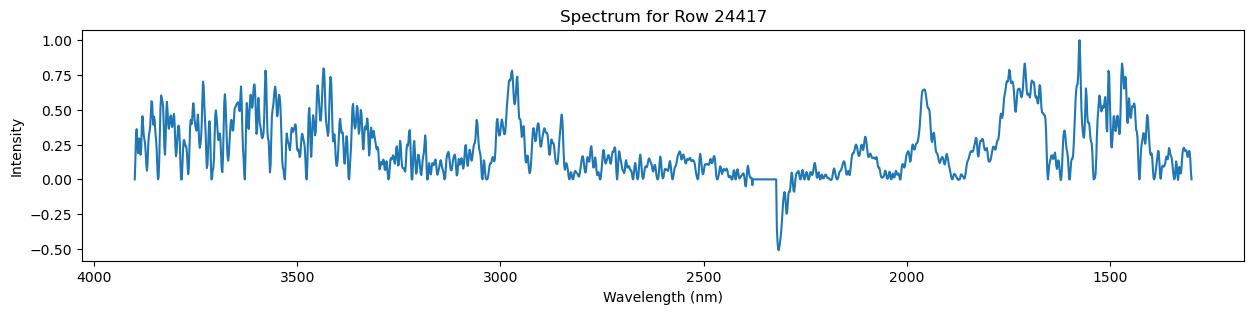

Calculated ratios for Row 24417:
  2950 cm-1 / 2500 cm-1: 10.49
  2950 cm-1 / 2600 cm-1: 61.15
  2950 cm-1 / 3500 cm-1: 1.92
  2950 cm-1 / 3800 cm-1: 1.70
Total number of rows where all ratios: 1722


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PET_4"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 3500,3800]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3800]] != 0)

data_df = data_df[denominator_mask]


ROW_INDEX = 24417 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2950_2600 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2950_3500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3500]]])
    selected_row_ratio_2950_3800 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3800]]])

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3500 cm-1: {selected_row_ratio_2950_3500:.2f}")
    print(f"  2950 cm-1 / 3800 cm-1: {selected_row_ratio_2950_3800:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2950_2500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2950_2600 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2950_3500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3500]])
ratio_2950_3800 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3800]])

both_ratios_mask = (ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 10) & (ratio_2950_3800 > 10)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PET_conversion_4 = data_df[(ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 10) & (ratio_2950_3800 > 10)].copy()
PET_conversion_4.loc[:, 'Polymer'] = 4

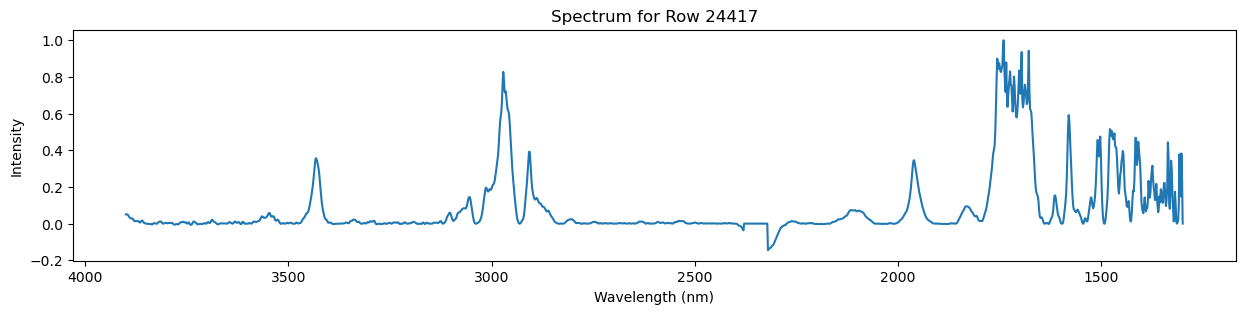

Calculated ratios for Row 24417:
  2950 cm-1 / 2500 cm-1: 73.32
  2950 cm-1 / 2600 cm-1: 960.21
  2950 cm-1 / 3500 cm-1: 146.90
  2950 cm-1 / 3800 cm-1: 97.76
Total number of rows where all ratios: 99439


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PET_5"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 3500,3800]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3800]] != 0)

data_df = data_df[denominator_mask]


ROW_INDEX = 24417 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2950_2600 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2950_3500 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3500]]])
    selected_row_ratio_2950_3800 = abs(selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3800]]])

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3500 cm-1: {selected_row_ratio_2950_3500:.2f}")
    print(f"  2950 cm-1 / 3800 cm-1: {selected_row_ratio_2950_3800:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2950_2500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2950_2600 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2950_3500 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3500]])
ratio_2950_3800 = abs(data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3800]])

both_ratios_mask = (ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 10) & (ratio_2950_3800 > 10)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PET_conversion_5 = data_df[(ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 10) & (ratio_2950_3800 > 10)].copy()
PET_conversion_5.loc[:, 'Polymer'] = 4

# PS

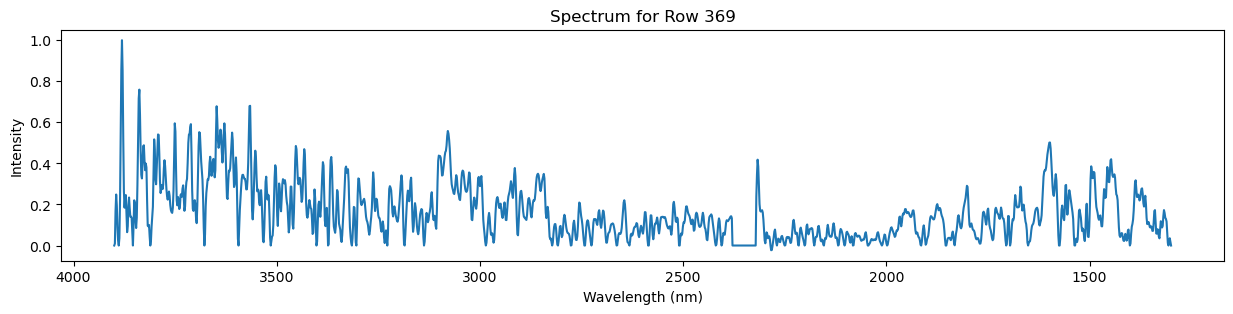

Calculated ratios for Row 369:
  2950 cm-1 / 2500 cm-1: 2.18
  2950 cm-1 / 2600 cm-1: 3.00
  2950 cm-1 / 3500 cm-1: 0.72
Total number of rows where all ratios > 35: 11777


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PS_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 3500]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0)

data_df = data_df[denominator_mask]

ROW_INDEX = 369 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2950_2600 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2950_3500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3500]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3500 cm-1: {selected_row_ratio_2950_3500:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")
    
ratio_2950_2500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2950_2600 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2950_3500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3500]]

both_ratios_mask = (ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 10: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PS_conversion_1 = data_df[(ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 5)].copy()
PS_conversion_1.loc[:, 'Polymer'] = 2


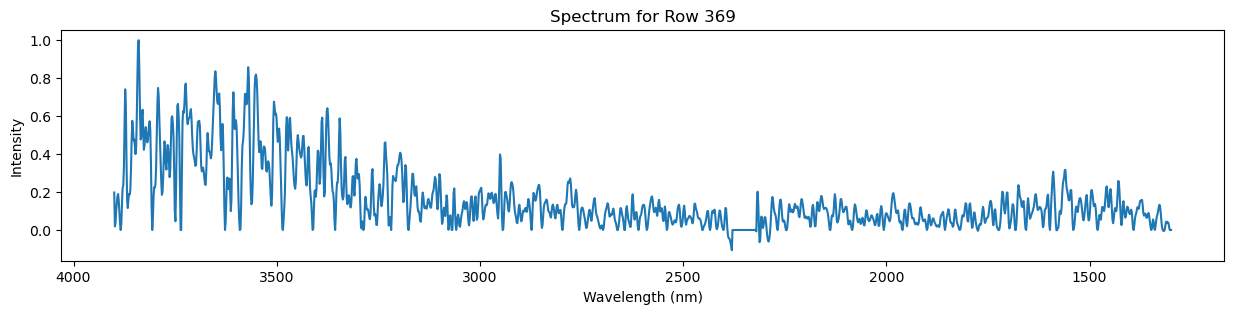

Calculated ratios for Row 369:
  2950 cm-1 / 2500 cm-1: 5.95
  2950 cm-1 / 2600 cm-1: 3.29
  2950 cm-1 / 3500 cm-1: 0.67
Total number of rows where all ratios > 35: 115441


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PS_2"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 3500]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0)

data_df = data_df[denominator_mask]

ROW_INDEX = 369 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2950_2600 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2950_3500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3500]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3500 cm-1: {selected_row_ratio_2950_3500:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")
    
ratio_2950_2500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2950_2600 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2950_3500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3500]]

both_ratios_mask = (ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 10: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PS_conversion_2 = data_df[(ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 5)].copy()
PS_conversion_2.loc[:, 'Polymer'] = 2

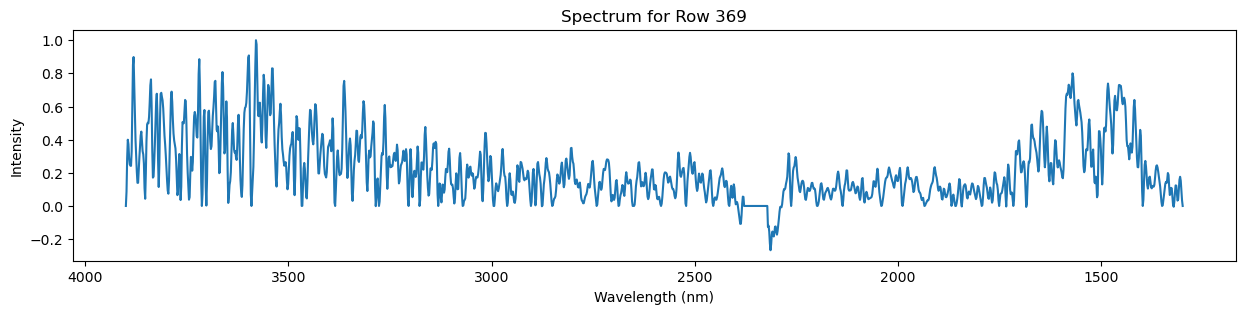

Calculated ratios for Row 369:
  2950 cm-1 / 2500 cm-1: 0.25
  2950 cm-1 / 2600 cm-1: 0.66
  2950 cm-1 / 3500 cm-1: 0.51
Total number of rows where all ratios > 35: 27416


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PS_3"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 3500]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0)

data_df = data_df[denominator_mask]

ROW_INDEX = 369 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2950_2600 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2950_3500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3500]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3500 cm-1: {selected_row_ratio_2950_3500:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")
    
ratio_2950_2500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2950_2600 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2950_3500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3500]]

both_ratios_mask = (ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 10: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PS_conversion_3 = data_df[(ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 5)].copy()
PS_conversion_3.loc[:, 'Polymer'] = 2

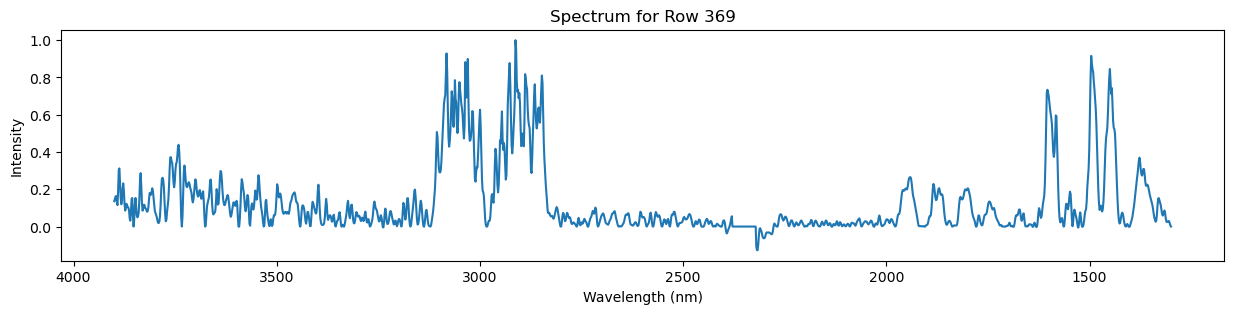

Calculated ratios for Row 369:
  2950 cm-1 / 2500 cm-1: 13.18
  2950 cm-1 / 2600 cm-1: 9.59
  2950 cm-1 / 3500 cm-1: 2.73
Total number of rows where all ratios > 10,10,& 5: 18033


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PS_4"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 3500]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0)

data_df = data_df[denominator_mask]

ROW_INDEX = 369 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2950_2600 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2950_3500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3500]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 3500 cm-1: {selected_row_ratio_2950_3500:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")
    
ratio_2950_2500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2950_2600 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2950_3500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3500]]

both_ratios_mask = (ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 10: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PS_conversion_4 = data_df[(ratio_2950_2500 > 10) & (ratio_2950_2600 > 10) & (ratio_2950_3500 > 5)].copy()
PS_conversion_4.loc[:, 'Polymer'] = 2

## PVDF

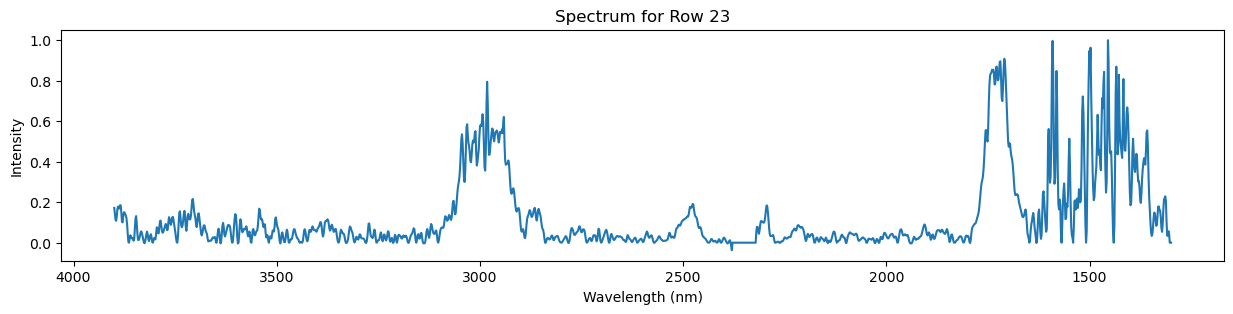

Calculated ratios for Row 23:
  3000 cm-1 / 2500 cm-1: 5.20
  3000 cm-1 / 2600 cm-1: 65.47
  3000 cm-1 / 3500 cm-1: 5.69
Total number of rows where all ratios > 10,10,& 5: 23692


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PVDF_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [3000, 2600, 2500, 3500]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0)
data_df = data_df[denominator_mask]


ROW_INDEX = 23 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_3000_2500 = selected_row[wavelengths[wavelength_indices[3000]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_3000_2600 = selected_row[wavelengths[wavelength_indices[3000]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_3000_3500 = selected_row[wavelengths[wavelength_indices[3000]]] / selected_row[wavelengths[wavelength_indices[3500]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  3000 cm-1 / 2500 cm-1: {selected_row_ratio_3000_2500:.2f}")
    print(f"  3000 cm-1 / 2600 cm-1: {selected_row_ratio_3000_2600:.2f}")
    print(f"  3000 cm-1 / 3500 cm-1: {selected_row_ratio_3000_3500:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_3000_2500 = data_df.iloc[:, wavelength_indices[3000]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_3000_2600 = data_df.iloc[:, wavelength_indices[3000]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_3000_3500 = data_df.iloc[:, wavelength_indices[3000]] / data_df.iloc[:, wavelength_indices[3500]]


both_ratios_mask = (ratio_3000_2500 > 5) & (ratio_3000_2600 > 5) & (ratio_3000_3500 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 5: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PVDF_conversion_1 = data_df[(ratio_3000_2500 > 5) & (ratio_3000_2600 > 5) & (ratio_3000_3500 > 5)].copy()
PVDF_conversion_1.loc[:, 'Polymer'] = 6

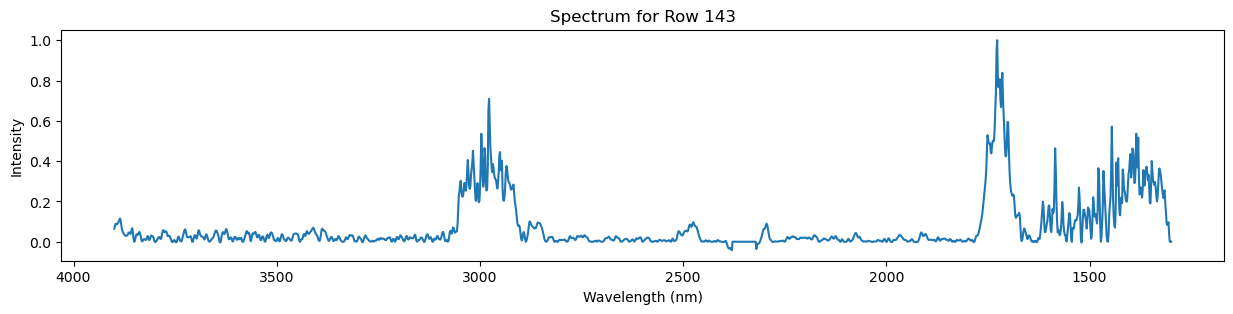

Calculated ratios for Row 143:
  3000 cm-1 / 2500 cm-1: 7.68
  3000 cm-1 / 2600 cm-1: 523.67
  3000 cm-1 / 3500 cm-1: 67.94
Total number of rows where all ratios > 10,10,& 5: 22699


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PVDF_2"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [3000, 2600, 2500, 3500]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0)
data_df = data_df[denominator_mask]


ROW_INDEX = 23 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_3000_2500 = selected_row[wavelengths[wavelength_indices[3000]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_3000_2600 = selected_row[wavelengths[wavelength_indices[3000]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_3000_3500 = selected_row[wavelengths[wavelength_indices[3000]]] / selected_row[wavelengths[wavelength_indices[3500]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  3000 cm-1 / 2500 cm-1: {selected_row_ratio_3000_2500:.2f}")
    print(f"  3000 cm-1 / 2600 cm-1: {selected_row_ratio_3000_2600:.2f}")
    print(f"  3000 cm-1 / 3500 cm-1: {selected_row_ratio_3000_3500:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_3000_2500 = data_df.iloc[:, wavelength_indices[3000]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_3000_2600 = data_df.iloc[:, wavelength_indices[3000]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_3000_3500 = data_df.iloc[:, wavelength_indices[3000]] / data_df.iloc[:, wavelength_indices[3500]]


both_ratios_mask = (ratio_3000_2500 > 5) & (ratio_3000_2600 > 5) & (ratio_3000_3500 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()

print(f"Total number of rows where all ratios > 5: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PVDF_conversion_2 = data_df[(ratio_3000_2500 > 5) & (ratio_3000_2600 > 5) & (ratio_3000_3500 > 5)].copy()
PVDF_conversion_2.loc[:, 'Polymer'] = 6

## Plant Wax 

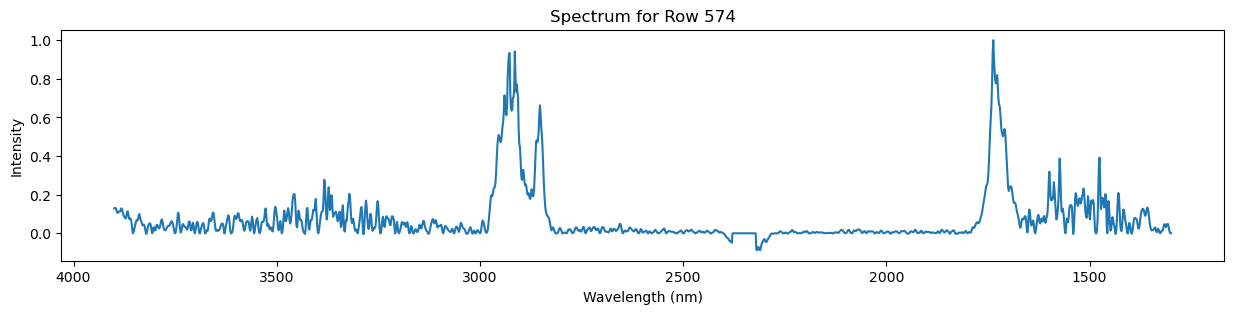

Calculated ratios for Row 574:
  2850 nm / 2500 nm: 1218.91
  2850 nm / 2600 nm: 96.91
Total number of rows where both ratios > 35: 9788


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "SNX_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [2850, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 574  # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2850_2500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2850_2600 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2850 nm / 2500 nm: {selected_row_ratio_2850_2500:.2f}")
    print(f"  2850 nm / 2600 nm: {selected_row_ratio_2850_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2850_2500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2850_2600 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2850_2500 > 35) & (ratio_2850_2600 > 35)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
SNX_conversion_1 = data_df[(ratio_2850_2500 > 35) & (ratio_2850_2600 > 35)].copy() 
SNX_conversion_1.loc[:, 'Polymer'] = 7

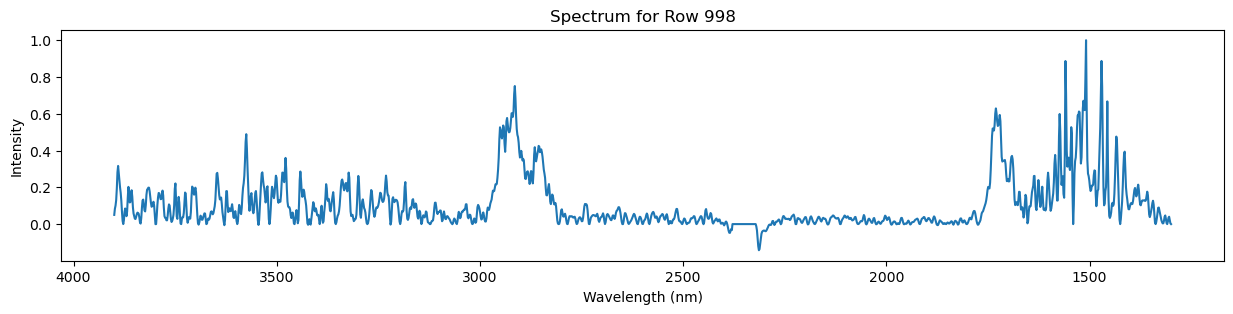

Calculated ratios for Row 998:
  2850 nm / 2500 nm: 49.73
  2850 nm / 2600 nm: 331.17
Total number of rows where both ratios > 35: 5337


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "SNX_2"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [2850, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 574  # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2850_2500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2850_2600 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2850 nm / 2500 nm: {selected_row_ratio_2850_2500:.2f}")
    print(f"  2850 nm / 2600 nm: {selected_row_ratio_2850_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2850_2500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2850_2600 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2850_2500 > 35) & (ratio_2850_2600 > 35)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
SNX_conversion_2 = data_df[(ratio_2850_2500 > 35) & (ratio_2850_2600 > 35)].copy()
SNX_conversion_2.loc[:, 'Polymer'] = 7

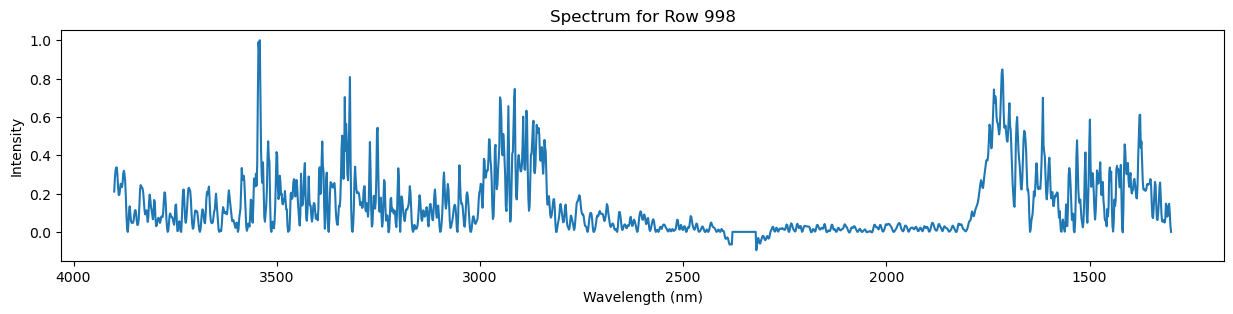

Calculated ratios for Row 998:
  2850 nm / 2500 nm: 38.71
  2850 nm / 2600 nm: 5.78
Total number of rows where both ratios > 35: 4378


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "SNX_3"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [2850, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 574  # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2850_2500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2850_2600 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2850 nm / 2500 nm: {selected_row_ratio_2850_2500:.2f}")
    print(f"  2850 nm / 2600 nm: {selected_row_ratio_2850_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2850_2500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2850_2600 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2850_2500 > 35) & (ratio_2850_2600 > 35)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
SNX_conversion_3 = data_df[(ratio_2850_2500 > 35) & (ratio_2850_2600 > 35)].copy()
SNX_conversion_3.loc[:, 'Polymer'] = 7

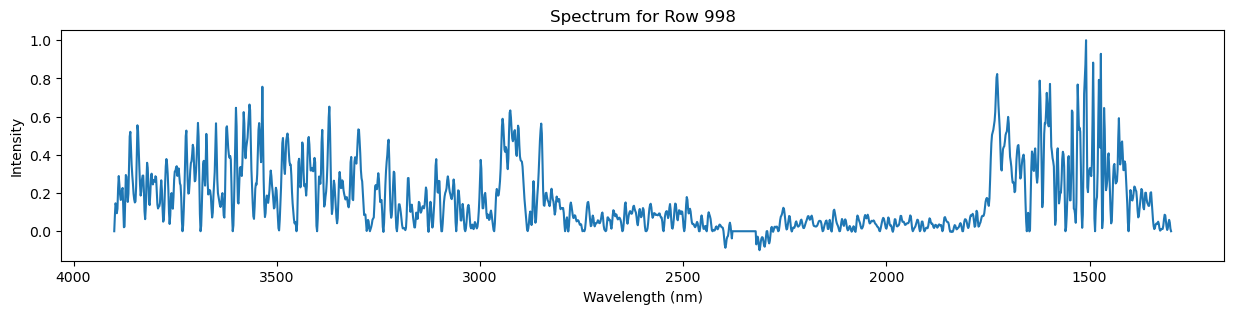

Calculated ratios for Row 998:
  2850 nm / 2500 nm: 7.83
  2850 nm / 2600 nm: 5.23
Total number of rows where both ratios > 35: 4900


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "SNX_4"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)


wavelength_targets = [2850, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 574  # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2850_2500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2850_2600 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2850 nm / 2500 nm: {selected_row_ratio_2850_2500:.2f}")
    print(f"  2850 nm / 2600 nm: {selected_row_ratio_2850_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2850_2500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2850_2600 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2850_2500 > 35) & (ratio_2850_2600 > 35)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
SNX_conversion_4 = data_df[(ratio_2850_2500 > 35) & (ratio_2850_2600 > 35)].copy() 
SNX_conversion_4.loc[:, 'Polymer'] = 7

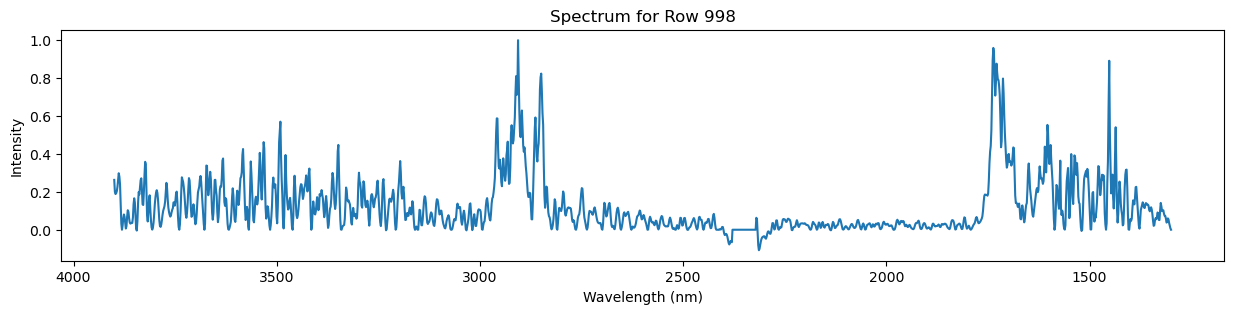

Calculated ratios for Row 998:
  2850 nm / 2500 nm: 32.77
  2850 nm / 2600 nm: 14.32
Total number of rows where both ratios > 35: 10313


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "BWX_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2850, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 574  # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2850_2500 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2850_2600 = selected_row[wavelengths[wavelength_indices[2850]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2850 nm / 2500 nm: {selected_row_ratio_2850_2500:.2f}")
    print(f"  2850 nm / 2600 nm: {selected_row_ratio_2850_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2850_2500 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2850_2600 = data_df.iloc[:, wavelength_indices[2850]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2850_2500 > 35) & (ratio_2850_2600 > 35)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
BWX_conversion_1 = data_df[(ratio_2850_2500 > 35) & (ratio_2850_2600 > 35)].copy() 
BWX_conversion_1.loc[:, 'Polymer'] = 7

## Pine Pollen

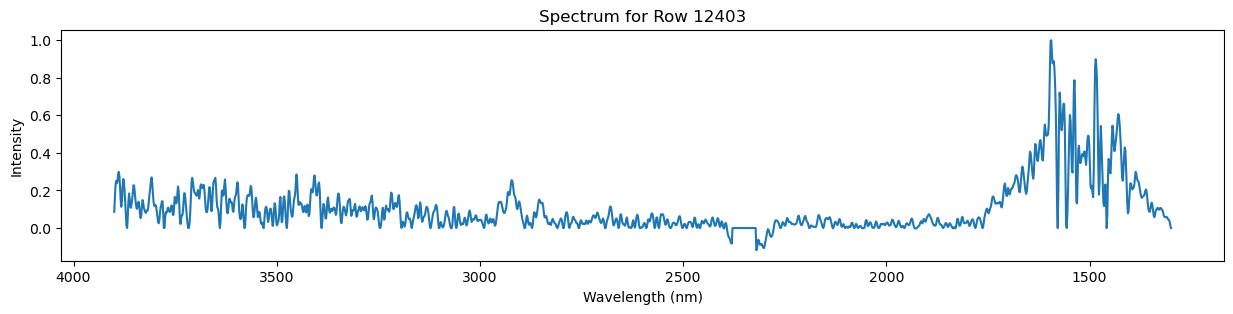

Calculated ratios for Row 12403:
  2950 cm-1 / 2500 cm-1: 104.56
  2950 cm-1 / 2600 cm-1: 44.09
  2950 cm-1 / 2700 cm-1: 4.23
  2950 cm-1 / 3900 cm-1: 1.58
Total number of rows where all ratios > 35: 3063


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PPP_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2950, 2600, 2500, 2700, 3900]  # Added 3200 and 3300
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2700]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3900]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 12403  # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2950_2500 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2950_2600 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2600]]]
    selected_row_ratio_2950_2700 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[2700]]]
    selected_row_ratio_2950_3900 = selected_row[wavelengths[wavelength_indices[2950]]] / selected_row[wavelengths[wavelength_indices[3900]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2950 cm-1 / 2500 cm-1: {selected_row_ratio_2950_2500:.2f}")
    print(f"  2950 cm-1 / 2600 cm-1: {selected_row_ratio_2950_2600:.2f}")
    print(f"  2950 cm-1 / 2700 cm-1: {selected_row_ratio_2950_2700:.2f}")
    print(f"  2950 cm-1 / 3900 cm-1: {selected_row_ratio_2950_3900:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2950_2500 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2950_2600 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2600]]
ratio_2950_2700 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[2700]]
ratio_2950_3900 = data_df.iloc[:, wavelength_indices[2950]] / data_df.iloc[:, wavelength_indices[3900]]
both_ratios_mask = (ratio_2950_2500 > 25) & (ratio_2950_2600 > 25) & (ratio_2950_2700 > 1) & (ratio_2950_3900 > 1)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where all ratios > 25,25,1,1: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PPP_conversion_1 = data_df[(ratio_2950_2500 > 25) & (ratio_2950_2600 > 25) & (ratio_2950_2700 > 1) & (ratio_2950_3900 > 1)].copy() 
PPP_conversion_1.loc[:, 'Polymer'] = 8

# PU

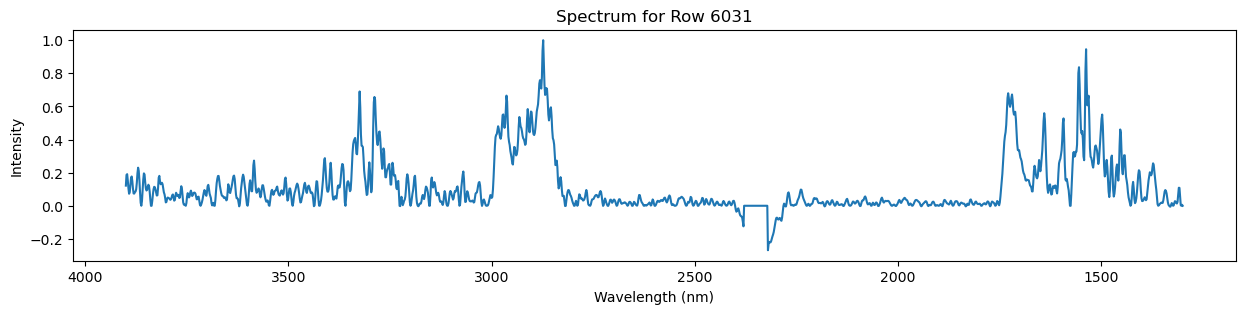

Calculated ratios for Row 6031:
  2900 cm-1 / 2500 cm-1: 42.87
  2900 cm-1 / 2600 cm-1: 41.76
Total number of rows where both ratios > 35: 336


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PU_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 6031 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2900_2600 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2900_2500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2900_2600 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2900_2500 > 35) & (ratio_2900_2600 > 35)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PU_conversion_1 = data_df[(ratio_2900_2500 > 35) & (ratio_2900_2600 > 35)].copy() 
PU_conversion_1.loc[:, 'Polymer'] = 10

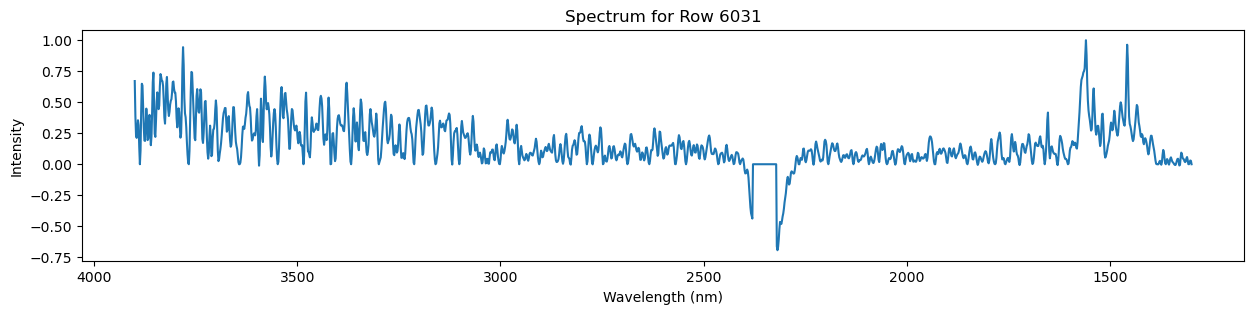

Calculated ratios for Row 6031:
  2900 cm-1 / 2500 cm-1: 1.00
  2900 cm-1 / 2600 cm-1: 1.49
Total number of rows where both ratios > 35: 302


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PU_2"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 6031 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2900_2600 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2900_2500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2900_2600 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2900_2500 > 35) & (ratio_2900_2600 > 35)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PU_conversion_2 = data_df[(ratio_2900_2500 > 35) & (ratio_2900_2600 > 35)].copy() 
PU_conversion_2.loc[:, 'Polymer'] = 10

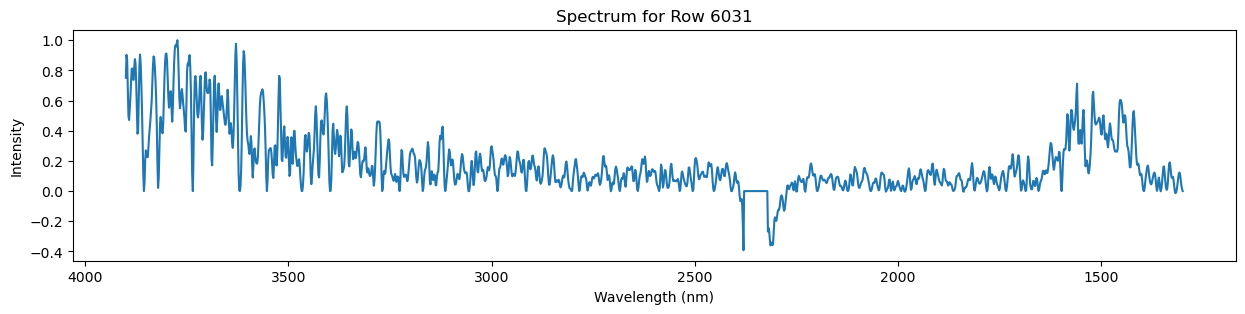

Calculated ratios for Row 6031:
  2900 cm-1 / 2500 cm-1: 1.47
  2900 cm-1 / 2600 cm-1: 1.85
Total number of rows where both ratios > 35: 890


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PU_3"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 6031 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2900_2600 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2900_2500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2900_2600 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2900_2500 > 35) & (ratio_2900_2600 > 35)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PU_conversion_3 = data_df[(ratio_2900_2500 > 35) & (ratio_2900_2600 > 35)].copy() 
PU_conversion_3.loc[:, 'Polymer'] = 10

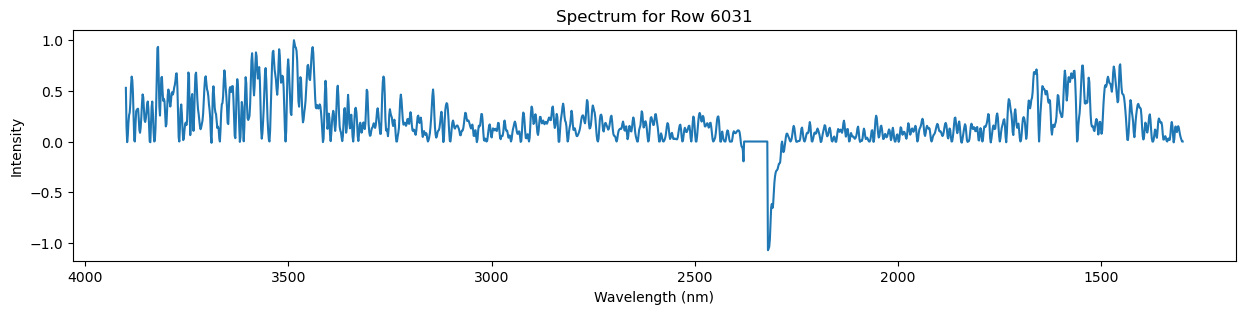

Calculated ratios for Row 6031:
  2900 cm-1 / 2500 cm-1: 2.02
  2900 cm-1 / 2600 cm-1: 1.97
Total number of rows where both ratios > 35: 520


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PU_4"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 6031 # Change as needed for Figure 

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2900_2600 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2900_2500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2900_2600 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2900_2500 > 35) & (ratio_2900_2600 > 35)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PU_conversion_4 = data_df[(ratio_2900_2500 > 35) & (ratio_2900_2600 > 35)].copy() 
PU_conversion_4.loc[:, 'Polymer'] = 10

# PP

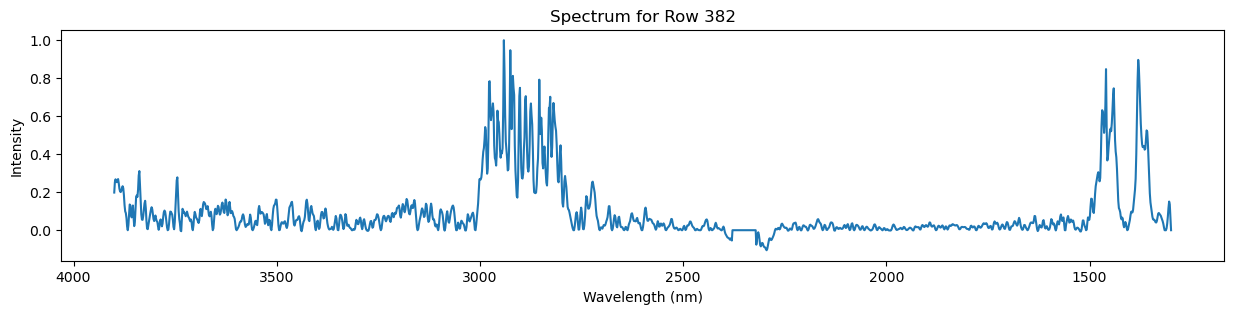

Calculated ratios for Row 382:
  2900 cm-1 / 2500 cm-1: 85.91
  2900 cm-1 / 2600 cm-1: 1812.98
  2900 cm-1 / 3500 cm-1: 3.14
  2900 cm-1 / 3700 cm-1: 5.92
Total number of rows where all ratios > 35: 36865
[31, 53, 60, 61, 62, 63, 64, 65, 69, 71, 72, 73, 75, 76, 78, 79, 87, 88, 90, 91, 98, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 224, 225, 226, 228, 360, 362, 364, 378, 380, 381, 383, 419, 420, 421, 422, 425, 426, 427, 428, 429, 430, 431, 432, 434, 638, 639, 670, 693, 696, 700, 703, 704, 707, 710, 711, 712, 714, 715, 716, 719, 720, 722, 726, 733, 735, 739, 740, 835, 837, 839, 840, 841, 842, 843, 844, 847, 848, 849, 850, 851, 852, 853, 854, 856, 857, 858, 859, 861, 863, 1000, 1001, 1003, 1005, 1016, 1019, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1071, 1072, 1073, 1074, 1278, 1329, 1335, 1339, 1340, 1341, 1342, 1343, 1345, 1347, 1348, 1349, 1350, 1351, 1354, 1355, 1357, 1358, 1361, 

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PP_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)

data_df = data_df[denominator_mask]

ROW_INDEX = 382 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2900_2600 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2900_3500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3500]]])
    selected_row_ratio_2900_3700 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3700]]])
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
    print(f"  2900 cm-1 / 3500 cm-1: {selected_row_ratio_2900_3500:.2f}")
    print(f"  2900 cm-1 / 3700 cm-1: {selected_row_ratio_2900_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2900_2500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2900_2600 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2900_3500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3500]])
ratio_2900_3700 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3700]])
both_ratios_mask = (ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where all ratios > 10,10,5,5: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PP_conversion_1 = data_df[(ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)].copy()
PP_conversion_1.loc[:, 'Polymer'] = 11

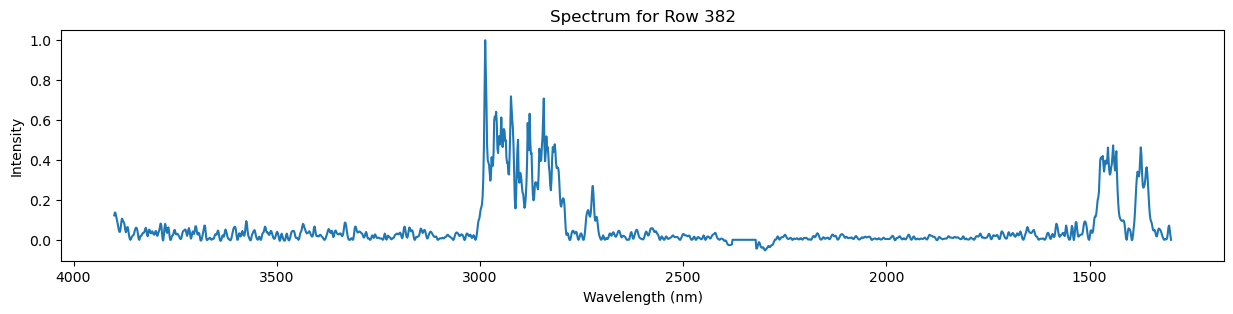

Calculated ratios for Row 382:
  2900 cm-1 / 2500 cm-1: 12.01
  2900 cm-1 / 2600 cm-1: 106.33
  2900 cm-1 / 3500 cm-1: 9.29
  2900 cm-1 / 3700 cm-1: 4.92
Total number of rows where all ratios > 35: 7954


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PP_2"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)

data_df = data_df[denominator_mask]

ROW_INDEX = 382 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2900_2600 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2900_3500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3500]]])
    selected_row_ratio_2900_3700 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3700]]])
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
    print(f"  2900 cm-1 / 3500 cm-1: {selected_row_ratio_2900_3500:.2f}")
    print(f"  2900 cm-1 / 3700 cm-1: {selected_row_ratio_2900_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2900_2500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2900_2600 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2900_3500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3500]])
ratio_2900_3700 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3700]])
both_ratios_mask = (ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where all ratios > 10,10,5,5: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PP_conversion_2 = data_df[(ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)].copy()
PP_conversion_2.loc[:, 'Polymer'] = 11

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PP_3"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)

data_df = data_df[denominator_mask]

ROW_INDEX = 382 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2900_2600 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2900_3500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3500]]])
    selected_row_ratio_2900_3700 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3700]]])
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
    print(f"  2900 cm-1 / 3500 cm-1: {selected_row_ratio_2900_3500:.2f}")
    print(f"  2900 cm-1 / 3700 cm-1: {selected_row_ratio_2900_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2900_2500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2900_2600 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2900_3500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3500]])
ratio_2900_3700 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3700]])
both_ratios_mask = (ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where all ratios > 10,10,5,5: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PP_conversion_3 = data_df[(ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)].copy()
PP_conversion_3.loc[:, 'Polymer'] = 11

Row 382 is not in the filtered data.
Total number of rows where all ratios > 35: 9230


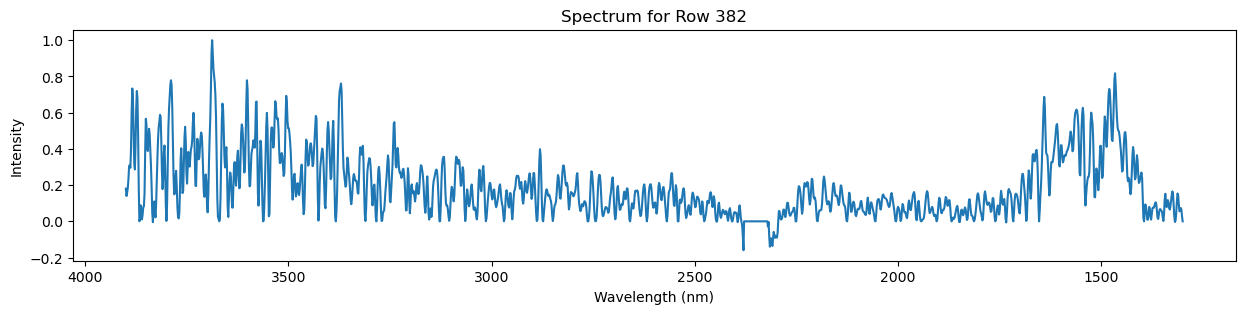

Calculated ratios for Row 382:
  2900 cm-1 / 2500 cm-1: 1.41
  2900 cm-1 / 2600 cm-1: 1.74
  2900 cm-1 / 3500 cm-1: 0.28
  2900 cm-1 / 3700 cm-1: 1.49
Total number of rows where all ratios > 35: 9578


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PP_4"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)

data_df = data_df[denominator_mask]

ROW_INDEX = 382 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2900_2600 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2900_3500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3500]]])
    selected_row_ratio_2900_3700 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3700]]])
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
    print(f"  2900 cm-1 / 3500 cm-1: {selected_row_ratio_2900_3500:.2f}")
    print(f"  2900 cm-1 / 3700 cm-1: {selected_row_ratio_2900_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2900_2500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2900_2600 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2900_3500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3500]])
ratio_2900_3700 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3700]])
both_ratios_mask = (ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where all ratios > 10,10,5,5: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PP_conversion_4 = data_df[(ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)].copy()
PP_conversion_4.loc[:, 'Polymer'] = 11

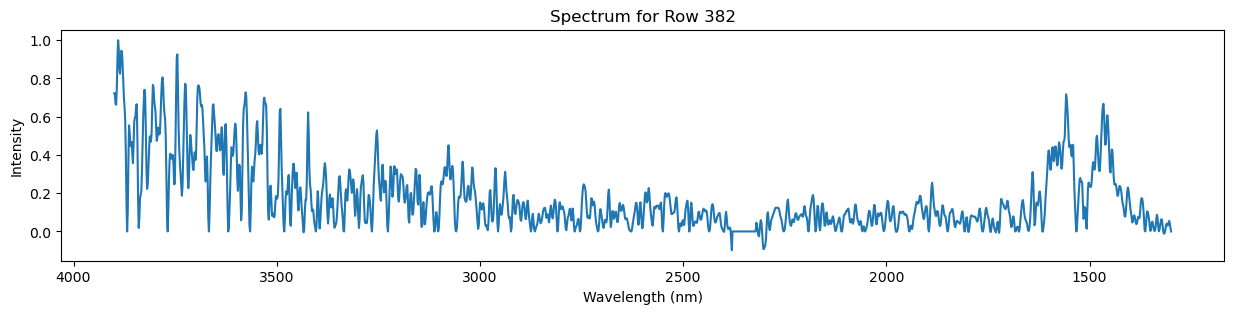

Calculated ratios for Row 382:
  2900 cm-1 / 2500 cm-1: 0.99
  2900 cm-1 / 2600 cm-1: 3.54
  2900 cm-1 / 3500 cm-1: 0.32
  2900 cm-1 / 3700 cm-1: 0.16
Total number of rows where all ratios > 35: 7330


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PP_5"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)

data_df = data_df[denominator_mask]

ROW_INDEX = 382 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2900_2600 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2900_3500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3500]]])
    selected_row_ratio_2900_3700 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3700]]])
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
    print(f"  2900 cm-1 / 3500 cm-1: {selected_row_ratio_2900_3500:.2f}")
    print(f"  2900 cm-1 / 3700 cm-1: {selected_row_ratio_2900_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2900_2500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2900_2600 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2900_3500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3500]])
ratio_2900_3700 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3700]])
both_ratios_mask = (ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where all ratios > 10,10,5,5: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PP_conversion_5 = data_df[(ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)].copy()
PP_conversion_5.loc[:, 'Polymer'] = 11

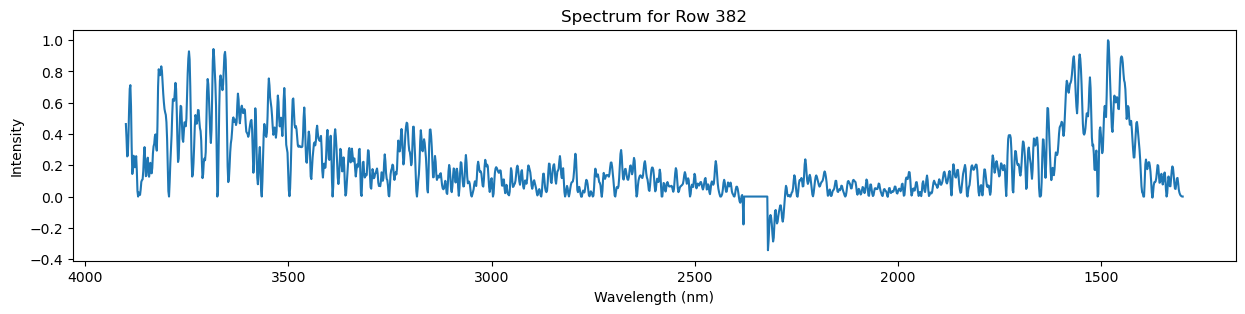

Calculated ratios for Row 382:
  2900 cm-1 / 2500 cm-1: 0.34
  2900 cm-1 / 2600 cm-1: 0.38
  2900 cm-1 / 3500 cm-1: 0.30
  2900 cm-1 / 3700 cm-1: 0.07
Total number of rows where all ratios > 35: 3471


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_prefix = "PP_6"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500, 3500, 3700]  
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[3700]] != 0)

data_df = data_df[denominator_mask]

ROW_INDEX = 382 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]])
    selected_row_ratio_2900_2600 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]])
    selected_row_ratio_2900_3500 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3500]]])
    selected_row_ratio_2900_3700 = abs(selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[3700]]])
    
    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
    print(f"  2900 cm-1 / 3500 cm-1: {selected_row_ratio_2900_3500:.2f}")
    print(f"  2900 cm-1 / 3700 cm-1: {selected_row_ratio_2900_3700:.2f}")

else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")

ratio_2900_2500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]])
ratio_2900_2600 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]])
ratio_2900_3500 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3500]])
ratio_2900_3700 = abs(data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[3700]])
both_ratios_mask = (ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)
rows_with_all_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where all ratios > 10,10,5,5: {len(rows_with_all_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
PP_conversion_6 = data_df[(ratio_2900_2500 > 10) & (ratio_2900_2600 > 10) & (ratio_2900_3500 > 5) & (ratio_2900_3700 > 5)].copy()
PP_conversion_6.loc[:, 'Polymer'] = 11

# Cotton

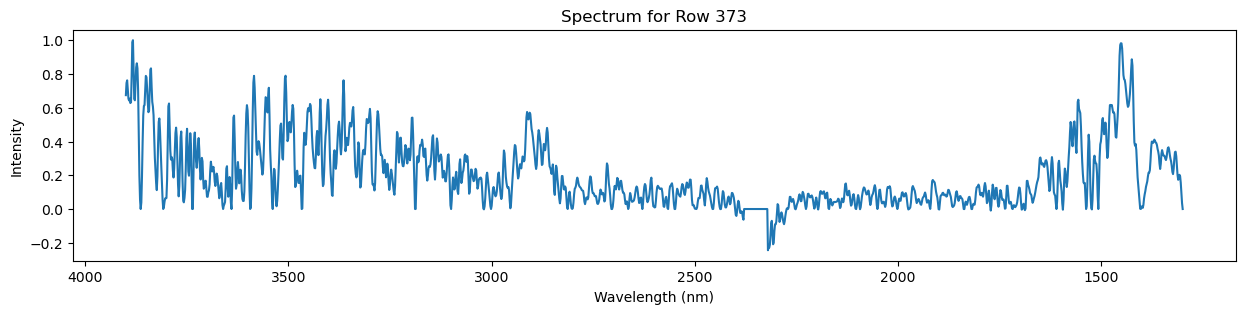

Calculated ratios for Row 373:
  2900 cm-1 / 2500 cm-1: 66.35
  2900 cm-1 / 2600 cm-1: 29.27
Total number of rows where both ratios > 35: 140
[373, 454, 542, 667, 832, 857, 863, 917, 1015, 1137, 1138, 1144, 1211, 1301, 1586, 1629, 1843, 2068, 2132, 2239, 2575, 2611, 2655, 2814, 2848, 2997, 3005, 3203, 3250, 3482, 3516, 3618, 3628, 3630, 3672, 3704, 3717, 3740, 3824, 3918, 4069, 4166, 4185, 4219, 4378, 4389, 4432, 4473, 4504, 4508, 4526, 4545, 4591, 4601, 4644, 4675, 4880, 5076, 5089, 5163, 5169, 5215, 5244, 5276, 5287, 5343, 5368, 5402, 5438, 5460, 5567, 5606, 5624, 5743, 5789, 5837, 5853, 5988, 6009, 6125, 6163, 6186, 6270, 6275, 6276, 6281, 6445, 6463, 6472, 6540, 6562, 6567, 6691, 6704, 6715, 6730, 6758, 6805, 6854, 6871, 6887, 6901, 7035, 7093, 7220, 7257, 7333, 7426, 7484, 7486, 7541, 7574, 7584, 7614, 7629, 7666, 7749, 7758, 7903, 7962, 7979, 8051, 8054, 8215, 8226, 8544, 8557, 8591, 8690, 8695, 8747, 8750, 8755, 8806, 8884, 8928, 8938, 9008, 9051, 9075]


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "Cotton_1"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 373 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2900_2600 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")
ratio_2900_2500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2900_2600 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2900_2500 > 20) & (ratio_2900_2600 > 20)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
Cotton_conversion_1 = data_df[(ratio_2900_2500 > 20) & (ratio_2900_2600 > 20)].copy() 
Cotton_conversion_1.loc[:, 'Polymer'] = 9

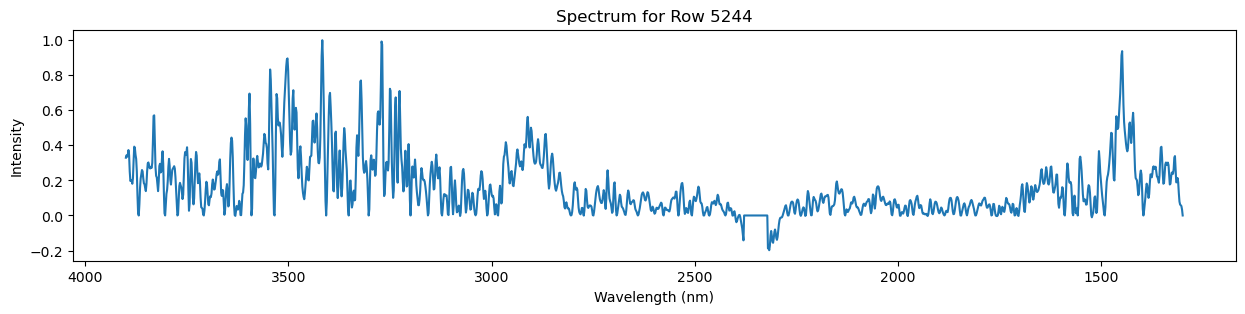

Calculated ratios for Row 5244:
  2900 cm-1 / 2500 cm-1: 4.21
  2900 cm-1 / 2600 cm-1: 20.23
Total number of rows where both ratios > 35: 221


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "Cotton_2"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 373 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2900_2600 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")
ratio_2900_2500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2900_2600 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2900_2500 > 20) & (ratio_2900_2600 > 20)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
Cotton_conversion_2 = data_df[(ratio_2900_2500 > 20) & (ratio_2900_2600 > 20)].copy() 
Cotton_conversion_2.loc[:, 'Polymer'] = 9

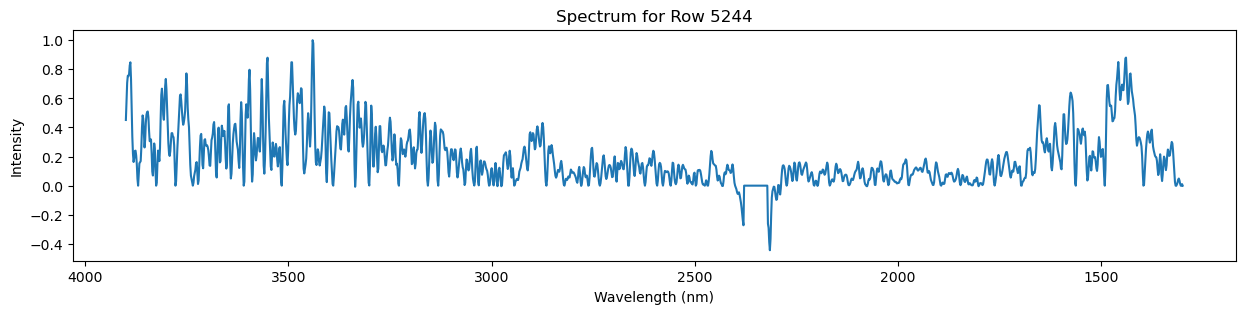

Calculated ratios for Row 5244:
  2900 cm-1 / 2500 cm-1: 3.70
  2900 cm-1 / 2600 cm-1: 1.45
Total number of rows where both ratios > 35: 231


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "Cotton_3"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 373 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2900_2600 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")
ratio_2900_2500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2900_2600 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2900_2500 > 20) & (ratio_2900_2600 > 20)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
Cotton_conversion_3 = data_df[(ratio_2900_2500 > 20) & (ratio_2900_2600 > 20)].copy() 
Cotton_conversion_3.loc[:, 'Polymer'] = 9

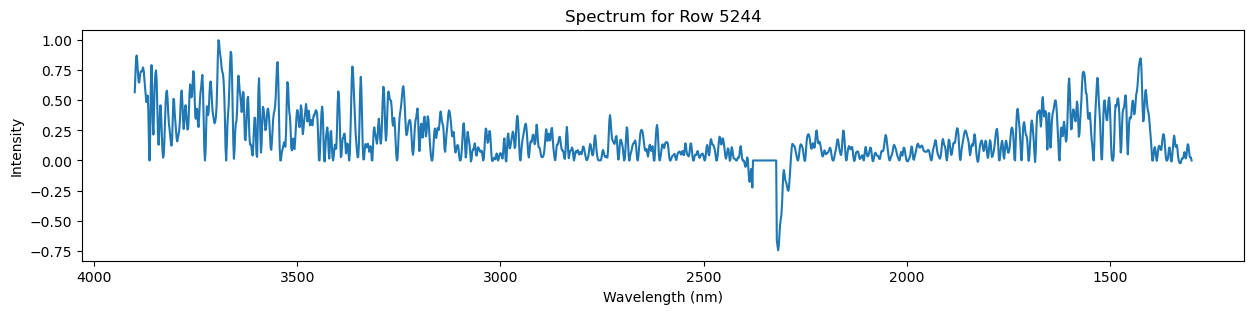

Calculated ratios for Row 5244:
  2900 cm-1 / 2500 cm-1: 0.89
  2900 cm-1 / 2600 cm-1: 0.27
Total number of rows where both ratios > 35: 415


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_prefix = "Cotton_4"
img_var = f"{file_prefix}img"
data_var = f"{file_prefix}_data"

# ----------- Load and reshape the hyperspectral data
img = globals()[img_var]
data = img.load().copy().reshape(-1, img.shape[2])
wavelengths = np.linspace(3899.75, 1299.39, num=img.shape[2])
# ------------ Data Preprocessing

# -------- 2380 - 2320 nm to zero for CO2 correction
wavelength_mask = (wavelengths >= 2320) & (wavelengths <= 2380)
data[:, wavelength_mask] = 0  # Set those columns to zero

# --------- Normalize each spectrum to a 1-0 scale
data = data / data.max(axis=1, keepdims=True)

wavelength_targets = [2900, 2600, 2500]
wavelength_indices = {w: np.argmin(np.abs(wavelengths - w)) for w in wavelength_targets}
data_df = pd.DataFrame(data, columns=wavelengths)
denominator_mask = (data_df.iloc[:, wavelength_indices[2500]] != 0) & \
                   (data_df.iloc[:, wavelength_indices[2600]] != 0)
data_df = data_df[denominator_mask]

ROW_INDEX = 373 # Change as needed for Figure

if ROW_INDEX in data_df.index:
    selected_row = data_df.loc[ROW_INDEX]

# ------- Plotting INDEX Spectra
    plt.figure(figsize=(15, 3))
    plt.plot(data_df.columns, selected_row)
    plt.gca().invert_xaxis()
    plt.title(f'Spectrum for Row {ROW_INDEX}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()

# -------- Setting Criteria for Spectra Selection 
    selected_row_ratio_2900_2500 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2500]]]
    selected_row_ratio_2900_2600 = selected_row[wavelengths[wavelength_indices[2900]]] / selected_row[wavelengths[wavelength_indices[2600]]]

    print(f"Calculated ratios for Row {ROW_INDEX}:")
    print(f"  2900 cm-1 / 2500 cm-1: {selected_row_ratio_2900_2500:.2f}")
    print(f"  2900 cm-1 / 2600 cm-1: {selected_row_ratio_2900_2600:.2f}")
else:
    print(f"Row {ROW_INDEX} is not in the filtered data.")
ratio_2900_2500 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2500]]
ratio_2900_2600 = data_df.iloc[:, wavelength_indices[2900]] / data_df.iloc[:, wavelength_indices[2600]]
both_ratios_mask = (ratio_2900_2500 > 20) & (ratio_2900_2600 > 20)
rows_with_both_high_ratios = data_df.index[both_ratios_mask].tolist()
print(f"Total number of rows where both ratios > 35: {len(rows_with_both_high_ratios)}")

# ---------- Saving the Data and Giving Category Number 
Cotton_conversion_4 = data_df[(ratio_2900_2500 > 20) & (ratio_2900_2600 > 20)].copy() 
Cotton_conversion_4.loc[:, 'Polymer'] = 9

# Building the dataset

### 01/22/2025 
- PMMA Batch 1 added (15659 rows) Polymer number 0 
- PE Batch 1 added (16185 rows) Polymer number 1
- PS Batch 1 added (11777 rows) Polymer number 2
- EVAc Batch 1 added (314 rows) Polymer number 3

### 01/29/2025
- PS Batch 2 added (115441 rows) Polymer number 2

### 01/30/2025
- PET Batch 1 added (561 rows) Polymer Number 4

### 01/31/2025
- PET Batch 2 added (22678) Polymer Number 4

### 02/01/2025 
- PA Batch 1 added (216) Polymer Number 5
- PE Batch 2 added (19460) Polymer Number 1
- PE Batch 3 added (7587) Polymer Number 1

### 02/02/2025 
- PA Batch 2 added (33233) Polymer Number 5
- PVDF Batch 1 added (23692) Polymer Number 6
- PVDF Batch 2 added (22699) Polymer Number 6
- BWX Batch 1 added (10313) Polymer Number 7 
- SNX Batch 1 added (9788) Polymer Number 7
- SNX Batch 2 added (5337) Polymer Number 7
- SNX Batch 3 added (4378) Polymer Number 7
- SNX Batch 4 added (4900) Polymer Number 7
- PPP Batch 1 added (3063) Polymer Number 8 

### 02/06/2025
- Cotton Batch 1 added (140) Polymer Number 9 
- Cotton Batch 2 added (221) Polymer Number 9
- Cotton Batch 3 added (231) Polymer Number 9
- Cotton Batch 4 added (415) Polymer Number 9
- PP Batch 1 added (36865) Polymer Number 11
- PU Batch 1 added (336) Polymer Number 10
- PU Batch 2 added (302) Polymer Number 10
- PU Batch 3 added (890) Polymer Number 10
- PU Batch 4 added (520) Polymer Number 10
- PET Batch 3 added (6099) Polymer Number 4
- PET Batch 4 added (1722) Polymer Number  4


### 02/07/2025
- ABS Batch 1 added (4103) Polymer Number 12
- ABS Batch 2 added (7473) Polymer Number 12

### 02/10/2025
- PET Batch 5 (99439) Polymer Number 4

### 02/12/2025
- PS Batch 3 (27416) Polymer Number 2
- PS Batch 4 (18033) Polymer Number 2
#### Removed PVC from Model

### 02/13/2025
- PP Batch 2 (7954) Polymer Number 11
- PP Batch 3 (9230) Polymer Number 11
- PP Batch 4 (9578) Polymer Number 11
- PP Batch 5 (7330) Polymer Number 11
- PP Batch 6 (3471) Polymer Number 11

In [92]:
Neural_network_meta = pd.concat([PMMA_conversion_1, 
                                 PE_conversion_1,
                                 PS_conversion_1,
                                 EVAC_conversion_1, 
                                 PS_conversion_2,
                                PET_conversion_1,
                                PET_conversion_2,
                                PA_conversion_1,
                                PE_conversion_2,
                                PE_conversion_3,
                                PVDF_conversion_1,
                                PVDF_conversion_2,
                                SNX_conversion_1,
                                SNX_conversion_2,
                                SNX_conversion_3,
                                SNX_conversion_4,
                                BWX_conversion_1,
                                PA_conversion_2,
                                PPP_conversion_1,
                                Cotton_conversion_1,
                                Cotton_conversion_2,
                                Cotton_conversion_3,
                                Cotton_conversion_4,
                                PU_conversion_1,
                                PU_conversion_2,
                                PU_conversion_3,
                                PU_conversion_4,
                                PP_conversion_1,
                                PET_conversion_3,
                                PET_conversion_4,
                                ABS_conversion_1,
                                ABS_conversion_2,
                                PET_conversion_5,
                                PS_conversion_3,
                                PS_conversion_4,
                                PP_conversion_2,
                                PP_conversion_3,
                                PP_conversion_4,
                                PP_conversion_5,
                                PP_conversion_6],
                                ignore_index=True)

print(Neural_network_meta['Polymer'].value_counts())

Polymer
2     172667
4     130499
11     74428
1      43232
7      34716
5      33449
0      15659
12     11576
8       3063
9       1007
3        314
Name: count, dtype: int64


# Building the Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


X = Neural_network_meta.drop(columns=['Polymer'])
y = Neural_network_meta['Polymer']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# --------- 80 - 20 Split ---- 80% train ---- 20% validate
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)  

model = Sequential()

# ---------- Input layer
model.add(Dense(000, input_dim=X_train.shape[1], activation = 'relu'))    # ----- Number of Input Nodes currently hidden


# --------- Hidden Layer 1
model.add(Dense(000, activation='relu'))     # ----- Number of Hidden Layer 1 Nodes currently hidden
model.add(Dropout(0.2))

# ---------- Hidden Layer 2
model.add(Dense(000, activation='relu'))     # ----- Number of Hidden Layer 2 Nodes currently hidden
model.add(Dropout(0.2))

# ------- Output Layer 
model.add(Dense(len(np.unique(y_encoded)), activation='softmax')) 


model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=000, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=000, batch_size=000, callbacks=[early_stopping])

# ---- epochs, batch_size, and patience values currently hidden 

# ------ Evalutating the model 
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy*100:.2f}%")

# ------ Visualizing Accuracy and Validations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ---- Saving the Model 
model.save('FTIR_ID Build Model.h5')


/common/software/install/manual/jupyter_kernels/DeepLearning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13016/13016 ━━━━━━━━━━━━━━━━━━━━ 186s 14ms/step - accuracy: 0.9923 - loss: 0.0294 - val_accuracy: 0.9991 - val_loss: 0.0050
Epoch 2/100
13016/13016 ━━━━━━━━━━━━━━━━━━━━ 168s 13ms/step - accuracy: 0.9989 - loss: 0.0054 - val_accuracy: 0.9983 - val_loss: 0.0064
Epoch 3/100
13016/13016 ━━━━━━━━━━━━━━━━━━━━ 160s 12ms/step - accuracy: 0.9990 - loss: 0.0059 - val_accuracy: 0.9997 - val_loss: 0.0017
Epoch 4/100
13016/13016 ━━━━━━━━━━━━━━━━━━━━ 159s 12ms/step - accuracy: 0.9993 - loss: 0.0048 - val_accuracy: 0.9902 - val_loss: 0.2001
Epoch 5/100
13016/13016 ━━━━━━━━━━━━━━━━━━━━ 163s 13ms/step - accuracy: 0.9993 - loss: 0.0047 - val_accuracy: 0.9997 - val_loss: 0.0015
Epoch 6/100
13016/13016 ━━━━━━━━━━━━━━━━━━━━ 166s 13ms/step - accuracy: 0.9994 - loss: 0.0048 - val_accuracy: 0.9996 - val_loss: 0.0028
Epoch 7/100
13016/13016 ━━━━━━━━━━━━━━━━━━━━ 160s 12ms/step - accuracy: 0.9995 - loss: 0.0050 - val_accuracy: 0.9991 - val_loss: 0.0033
Epoch 8/100
13016/13016 ━━━━━━━━━━━━━━━━━━━━ 173

# Confusion Matrix

3254/3254 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step


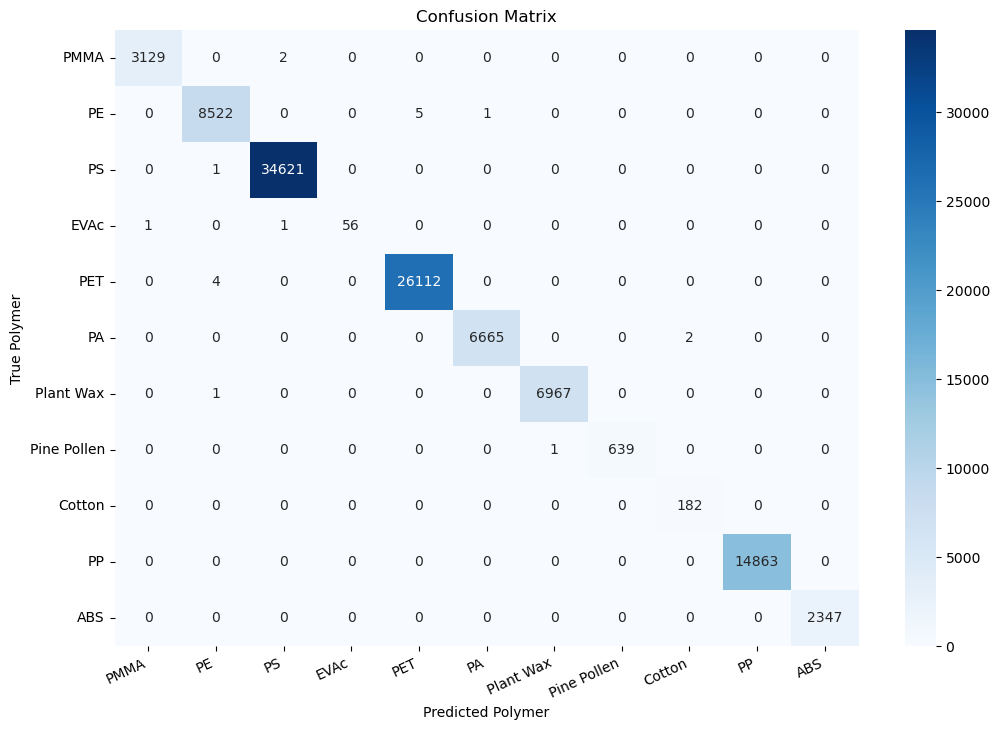

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred = model.predict(X_val)  
y_pred_classes = np.argmax(y_pred, axis=1)  
cm = confusion_matrix(y_val, y_pred_classes)

# ---- Re-Assign values to labels
label_mapping = {
    0: "PMMA",
    1: "PE",
    2: "PS",
    3: "EVAc",
    4: "PET",
    5: "PA",
    #6: "PVDF",
    7: "Plant Wax",
    8: "Pine Pollen",
    9: "Cotton",
    #10: "PU",
    11: "PP",
    12: "ABS"
}


class_names = [label_mapping[i] for i in sorted(label_mapping.keys())] 

# ------ Figure of Confusion Matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xticks(rotation=25, ha='right')  
plt.yticks(rotation=0)
plt.xlabel('Predicted Polymer')
plt.ylabel('True Polymer')
plt.title('Confusion Matrix')
plt.show()
